<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gravity-n_body-problems" data-toc-modified-id="Gravity-n_body-problems-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Gravity n_body problems</a></span></li><li><span><a href="#Charged-Particle-n_body-problem" data-toc-modified-id="Charged-Particle-n_body-problem-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Charged Particle n_body problem</a></span></li></ul></li><li><span><a href="#Custom-Hamiltonian" data-toc-modified-id="Custom-Hamiltonian-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Custom Hamiltonian</a></span><ul class="toc-item"><li><span><a href="#Motion-in-Cone" data-toc-modified-id="Motion-in-Cone-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motion in Cone</a></span></li><li><span><a href="#Double-Pendulum" data-toc-modified-id="Double-Pendulum-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Double Pendulum</a></span></li><li><span><a href="#Spring" data-toc-modified-id="Spring-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Spring</a></span></li><li><span><a href="#Double-Spring-Pendulum" data-toc-modified-id="Double-Spring-Pendulum-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Double Spring Pendulum</a></span></li><li><span><a href="#Planets" data-toc-modified-id="Planets-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Planets</a></span></li><li><span><a href="#Charged-Particles" data-toc-modified-id="Charged-Particles-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Charged Particles</a></span></li></ul></li><li><span><a href="#3D-animation" data-toc-modified-id="3D-animation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3D animation</a></span><ul class="toc-item"><li><span><a href="#Gravity-n-body" data-toc-modified-id="Gravity-n-body-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gravity n-body</a></span></li><li><span><a href="#Charged-n-body" data-toc-modified-id="Charged-n-body-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Charged n-body</a></span></li></ul></li><li><span><a href="#Charged-2-Body-System,-(Nucleus-has-infinite-mass)" data-toc-modified-id="Charged-2-Body-System,-(Nucleus-has-infinite-mass)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Charged 2 Body System, (Nucleus has infinite mass)</a></span><ul class="toc-item"><li><span><a href="#Equations-with-Singularities-At-$\alpha-=-0,-\pi/2$" data-toc-modified-id="Equations-with-Singularities-At-$\alpha-=-0,-\pi/2$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Equations with Singularities At $\alpha = 0, \pi/2$</a></span></li><li><span><a href="#Non-Singular-Equations-(E-=-0)" data-toc-modified-id="Non-Singular-Equations-(E-=-0)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Non Singular Equations (E = 0)</a></span></li><li><span><a href="#Non-Singular-Equations-(E-!=-0)" data-toc-modified-id="Non-Singular-Equations-(E-!=-0)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Non Singular Equations (E != 0)</a></span></li><li><span><a href="#PSOS" data-toc-modified-id="PSOS-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>PSOS</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import sympy as sp
import time

from ODEAnalysis import *
from n_Body_Simulation import *
from n_body_equations import *
from custom_hamiltonian import *

from functools import partial


import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
import multiprocessing
%matplotlib notebook 

In [2]:
# GoodOnes G=1
# 1D
# [5,-5,1,-1.5], m = [200,1]

# 2D
# [[0,0],[10,0],[0,0],[0,20]], m = [200,4]
# [[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]], m = [200,4, 1]

## Gravity n_body problems

We have the Hamiltonian,
> \begin{align*}
H = \sum_{i=1}^n \frac{||p_i||^2}{2m_i}  -  \sum_{(i,j)=(1,1)}^{(n,n)} \zeta_{ij}\frac{Gm_im_j}{||q_i-q_j||}
\end{align*}

Where $G$ is gravitational constant, with
>$$
\zeta_{ij} =
\begin{cases}
1, i>j\\
0, i\leq j
\end{cases}
$$

This leads to a system of ODE,

> \begin{align*}
\dot{q}_i &= \frac{p_i}{m_i}\\
\dot{p}_i &= -\sum_{j\in S_i}\frac{Gm_im_j}{||q_i-q_j||^3}(q_i-q_j)
\end{align*}

Where $S_i = \{1,2,...,n\}/\{i\}$

<IPython.core.display.Javascript object>


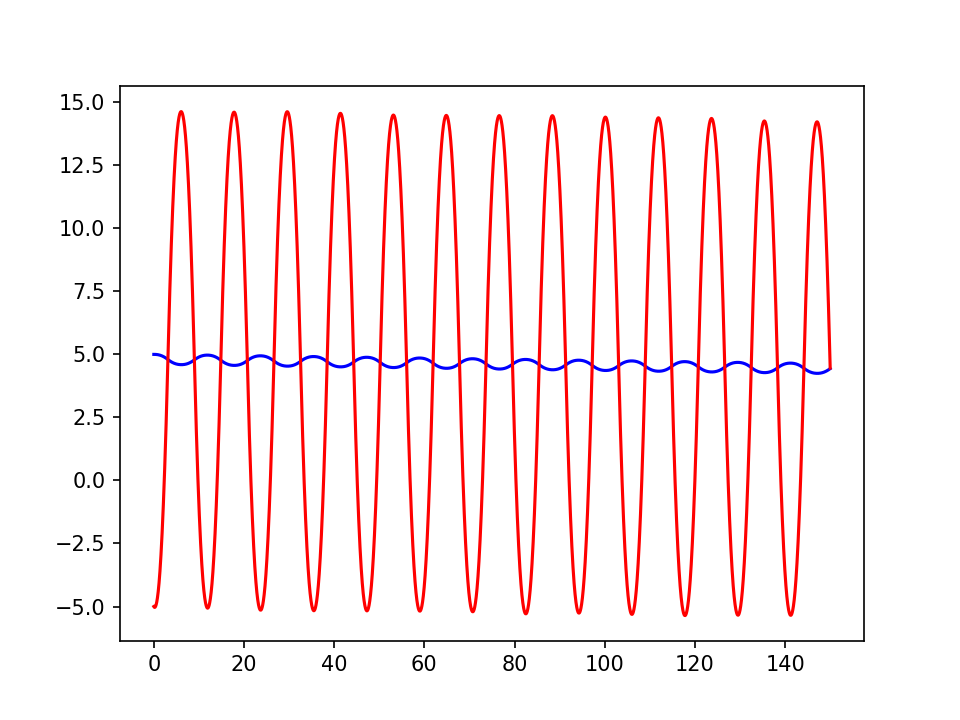

In [2]:
def body_2(t, q1, q2, p1, p2):
    #We have q1,q2,p1,p2 are numpy arrays(vectors) 
    m1 = 200
    m2 = 4
    G = 1
    
    dot_q1 = p1/m1 
    dot_q2 = p2/m2
    dot_p1 = -G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    dot_p2 = G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    
    if np.linalg.norm((dot_p1)) > 10:
        dot_p1 = 10*(dot_p1/np.linalg.norm(dot_p1))
        
        
    if np.linalg.norm(dot_p2) > 10:
        dot_p2 = 10*(dot_p2/np.linalg.norm(dot_p2))
 

    
    return np.array([dot_q1,dot_q2,dot_p1,dot_p2])
    
    
ODE = ODEAnalysis(body_2)    
a = ODE.RungeKutta(150,0,[[5],[-5],[1],[-1.5]])

plt.plot(a[0], a[1][:,0], color = 'Blue')
plt.plot(a[0], a[1][:,1], color = 'Red')
plt.show()

<IPython.core.display.Javascript object>


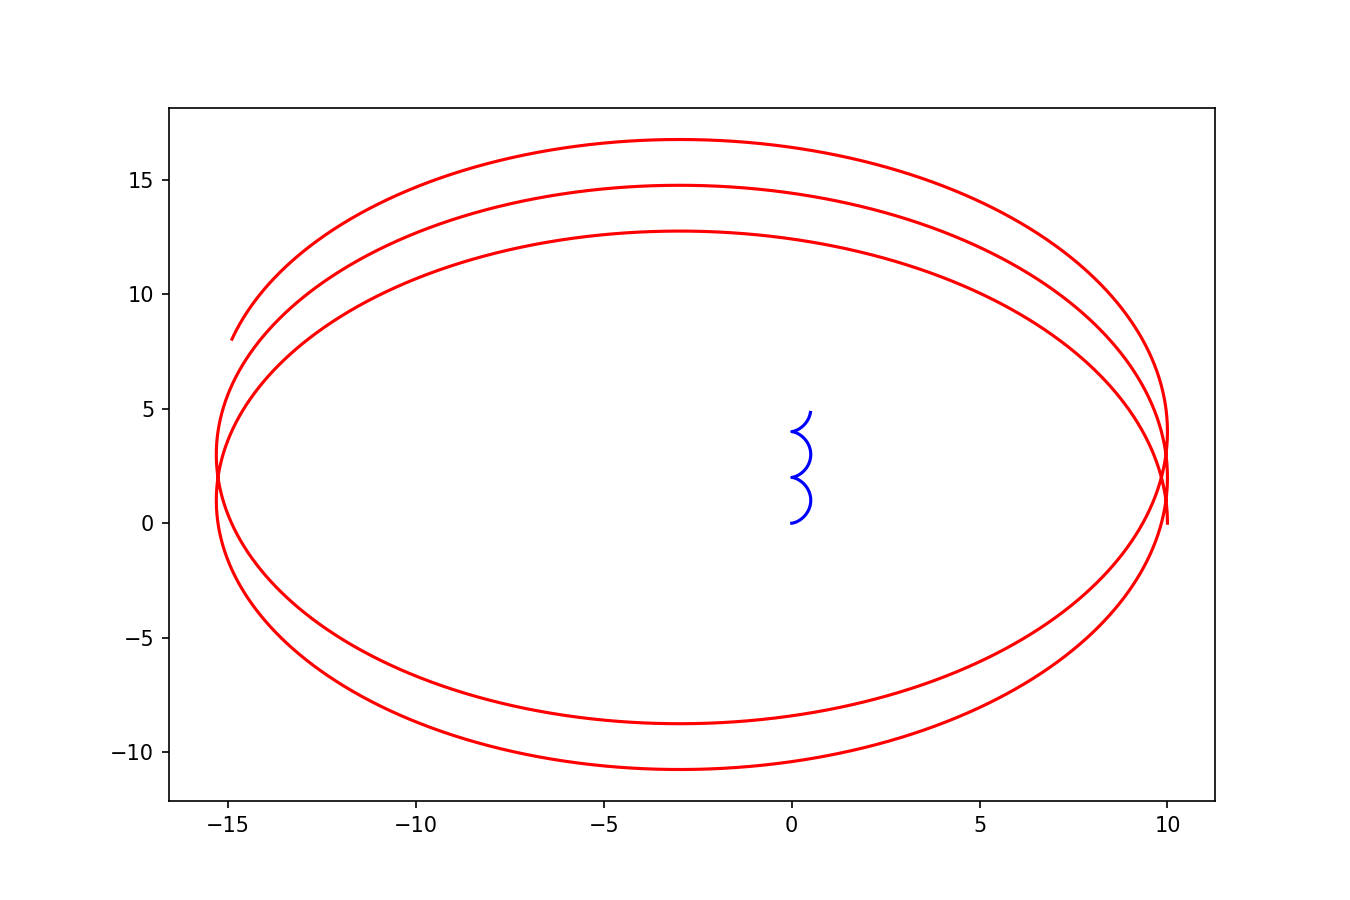

In [3]:
ODE = ODEAnalysis(body_2)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[0,0],[0,20]])

plt.figure(figsize=(9, 6))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.show()

<IPython.core.display.Javascript object>


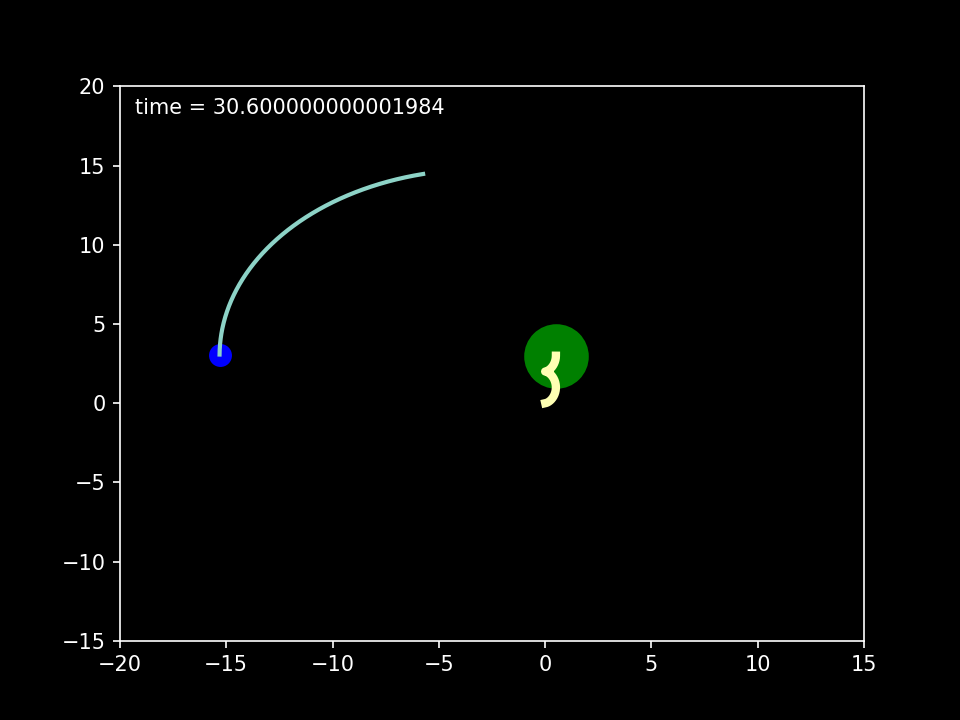

In [8]:
plt.style.use('dark_background')


Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed

fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)

Moon_Track, = ax.plot([],[], lw = 2)
Earth_Track, = ax.plot([],[], lw = 4)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    Earth_Track.set_data([],[])
    Moon_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, Earth_Track, Moon_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    
    Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, Earth_Track, Moon_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

#This line takes forever


<IPython.core.display.Javascript object>


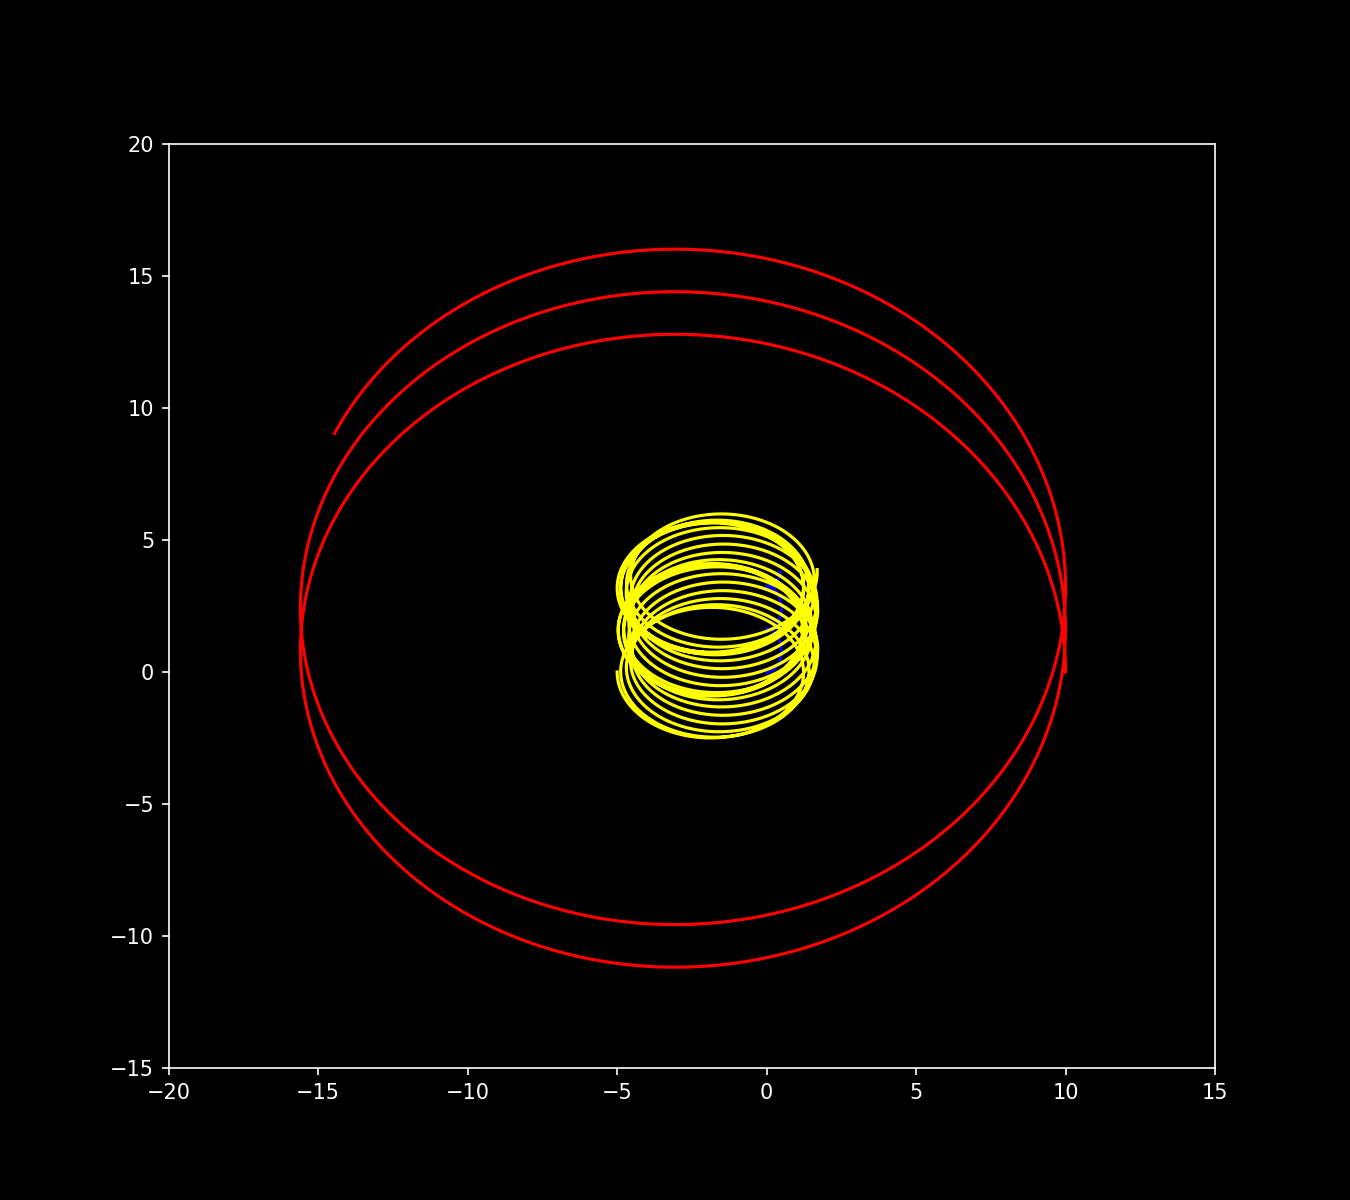

In [10]:
my_class = Grav_N_Body([])
my_class.mass = [200,4,1]
ODE = ODEAnalysis(my_class.n_body_system)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]])
plt.figure(figsize=(9, 8))
plt.axes(xlim=(-20, 15), ylim=(-15, 20))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.plot(x[:,2,0],x[:,2,1], color = "Yellow")
plt.show()

<IPython.core.display.Javascript object>


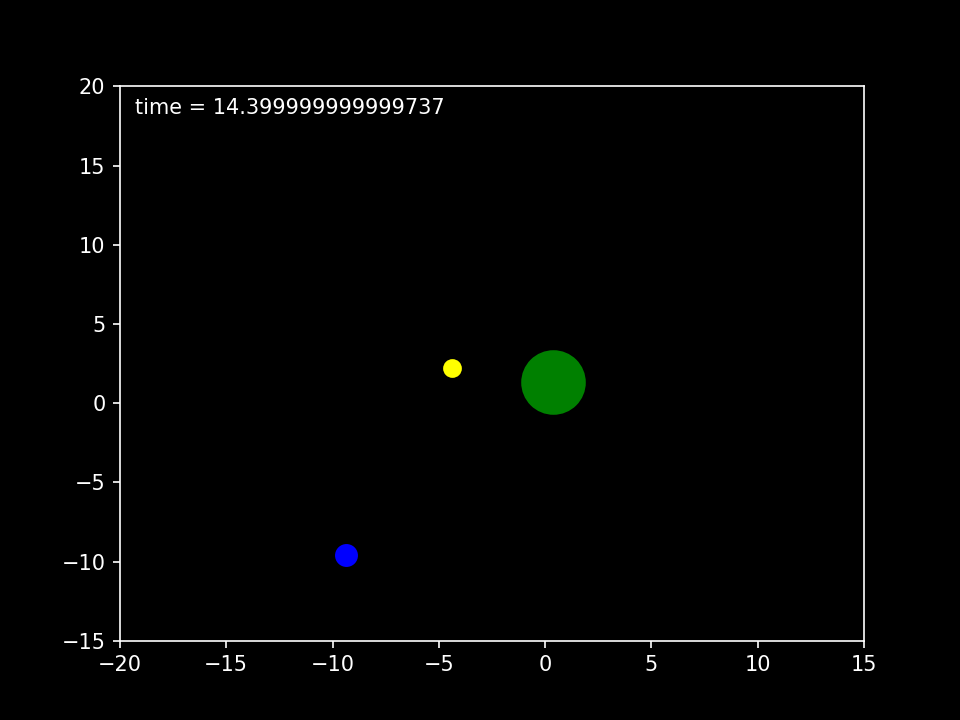

In [11]:
Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
UFO_x = x[:,2,0]
UFO_y = x[:,2,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed
plt.style.use('dark_background')


fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)
UFO, = ax.plot([], [], 'bo', ms = 8, color = "Yellow")

#Moon_Track, = ax.plot([],[], lw = 2)
#Earth_Track, = ax.plot([],[], lw = 4)
#UFO_Track, = ax.plot([],[], lw = 1.5)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    UFO.set_data([],[])
    
    #Earth_Track.set_data([],[])
   # Moon_Track.set_data([],[])
    #UFO_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    U_trace_len = 100
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    UFO.set_data(UFO_x[pos], UFO_y[pos])
    
    #Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    #Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    #UFO_Track.set_data(UFO_x[max(0,pos-U_trace_len):pos], UFO_y[max(0,pos-U_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

In [8]:
par_Grav_N_Body = partial(Grav_N_Body, G=1, dim = 2)
my_Sim_System = Simulation(Func_Class = par_Grav_N_Body, Sim_Name="4_body_orbit", Calc_Ham = True)
my_Sim_System.speed = 5
my_Sim_System.AddParts([200, 20, 1, 0.1, 0.1], [[0, 0], [15, 0], [-8, 0], [16.5, 0], [30, 30]],
                       [[0, 0], [5, 80], [0, -2], [0, 0], [-0.1, 0.1]], [1500, 500, 100, 100, 100], [30, 15, 5, 5, 5])
my_Sim_System.CalcPath(65)

<IPython.core.display.Javascript object>


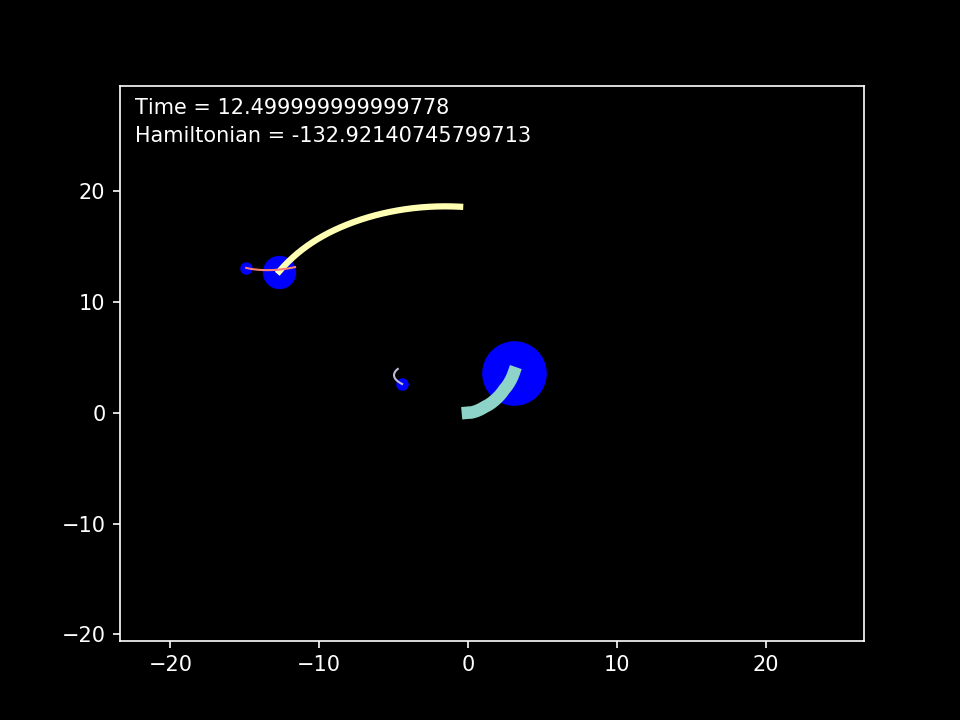

In [9]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_center_of_mass"
my_Sim_System.ShowAnimation(follow_mass = -1, size = 25)

<IPython.core.display.Javascript object>


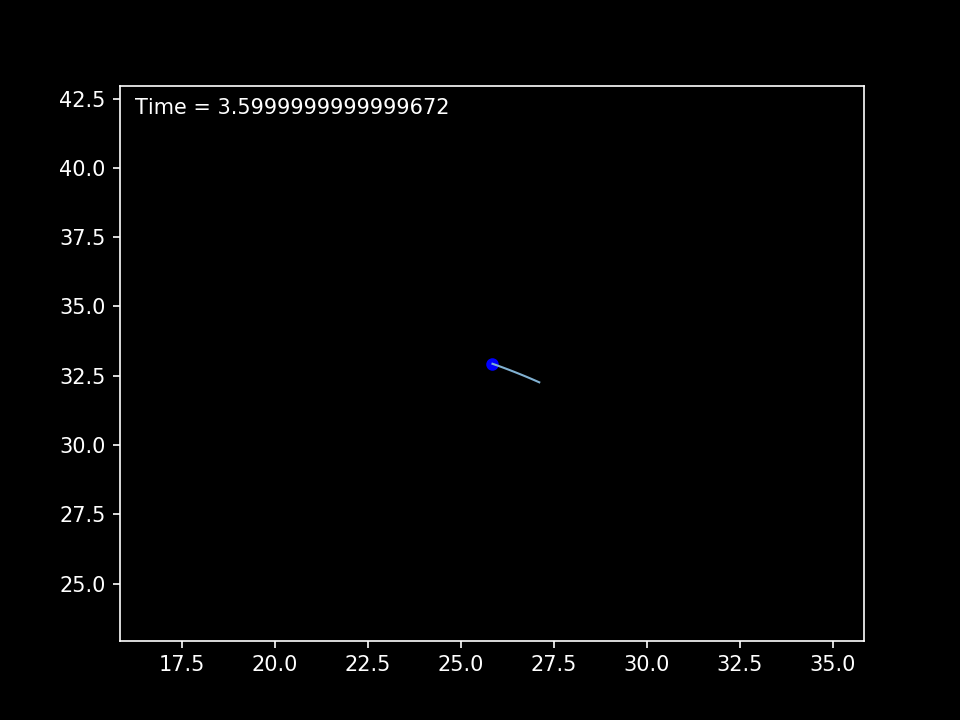

In [4]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_object_5"
my_Sim_System.ShowAnimation(follow_mass = 4, size = 10)

In [17]:
#8 body system
par_Grav_N_Body = partial(Grav_N_Body, G=1, dim = 2)
mass = [5]*8
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
trace_len = [200]*8
size = [15]*8
my_Sim_8 = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8.CalcPath(25)

<IPython.core.display.Javascript object>


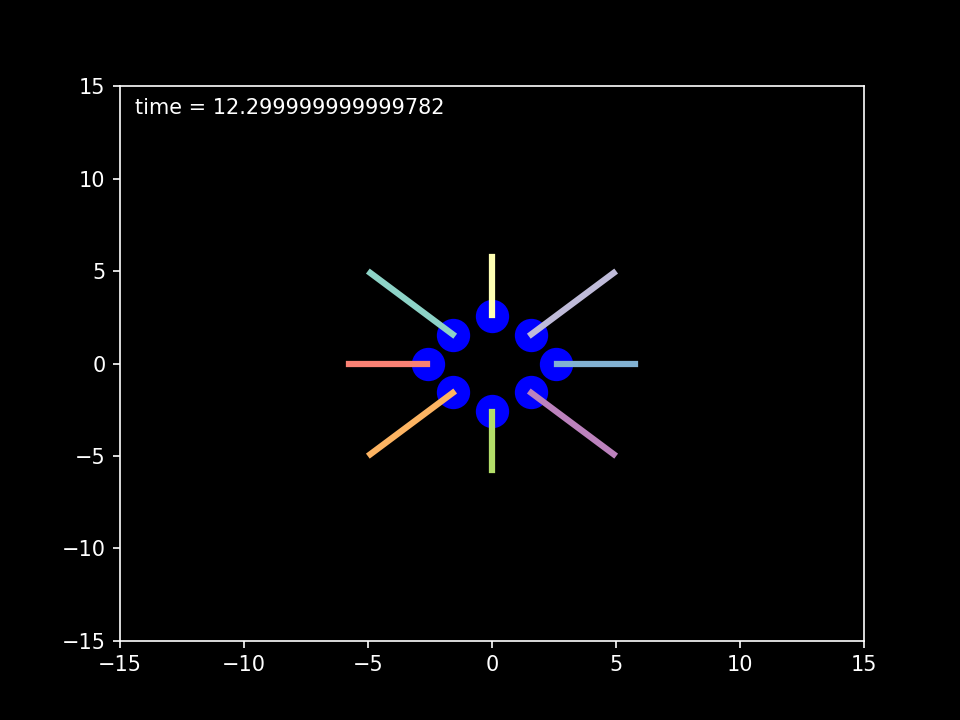

In [19]:
my_Sim_8.ShowAnimation()

In [6]:
#4 body system
par_Grav_N_Body = partial(Grav_N_Body, G= 1, dim=2)
mass = [15]*4
q_0 = [[-10,10],[10,10],[10,-10],[-10,-10]]
p_0 = [[3,3],[3,-3],[-3,-3],[-3,3]]
trace_len = [200]*4
size = [15]*4
my_Sim_4_Orbit = Simulation(Func_Class = par_Grav_N_Body, Calc_Ham = True)
my_Sim_4_Orbit.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_4_Orbit.CalcPath(50) #180

<IPython.core.display.Javascript object>


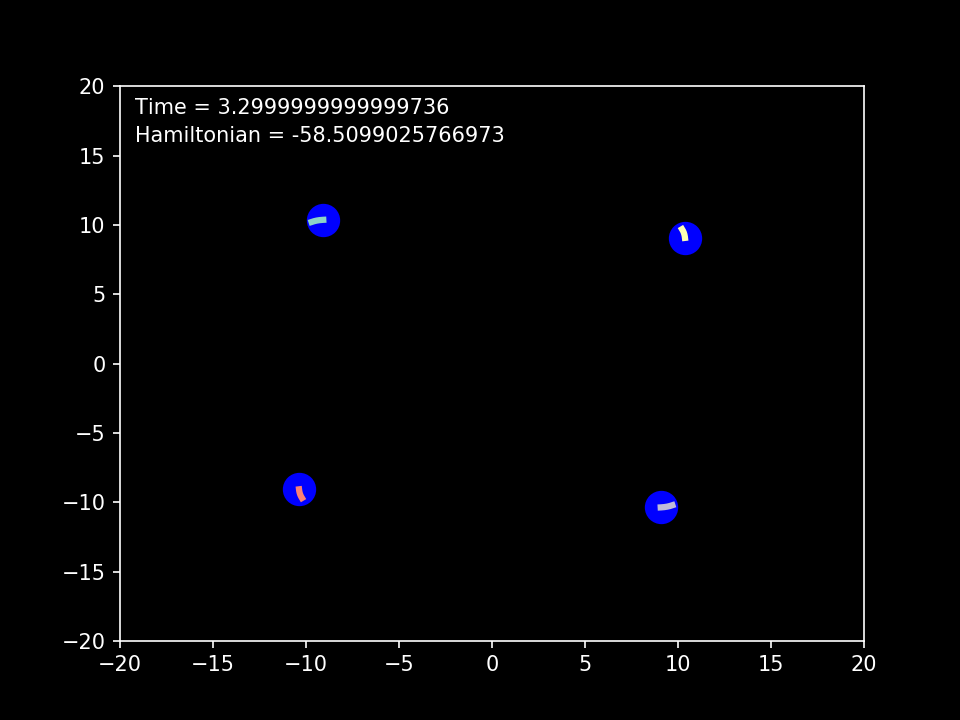

In [7]:
my_Sim_4_Orbit.speed = 30
my_Sim_4_Orbit.sim_name = "4_body_spiral"
my_Sim_4_Orbit.ShowAnimation(size = 20)

In [25]:
#8 body system
par_Grav_N_Body = partial(Grav_N_Body, G= 1, dim=2)

mass = [5]*8
a = 3*(2)**0.5
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8_Spiral.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral.CalcPath(100)


#8 body system
mass = [5]*8
a = 3*(2)**0.5
b = 10*(2)**0.5
q_0 = [[-10,10],[0,b],[10,10],[-b,0],[b,0],[-10,-10],[0,-b],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral2 = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8_Spiral2.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral2.CalcPath(100)

<IPython.core.display.Javascript object>


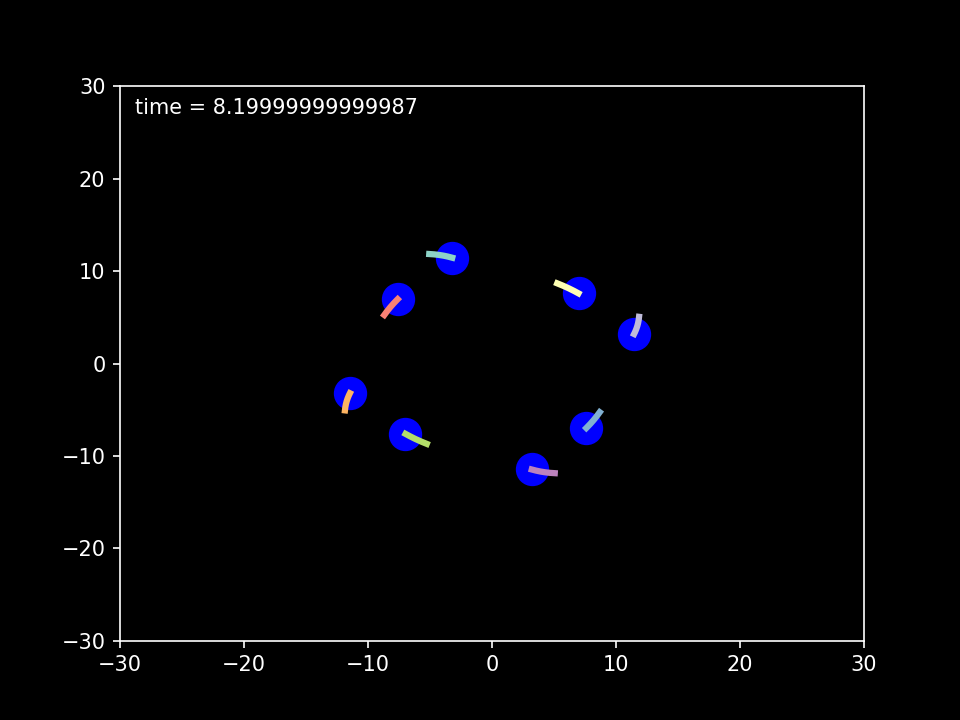

In [26]:
my_Sim_8_Spiral.sim_name = "8_body_spiral"
my_Sim_8_Spiral.ShowAnimation(size = 30)

<IPython.core.display.Javascript object>


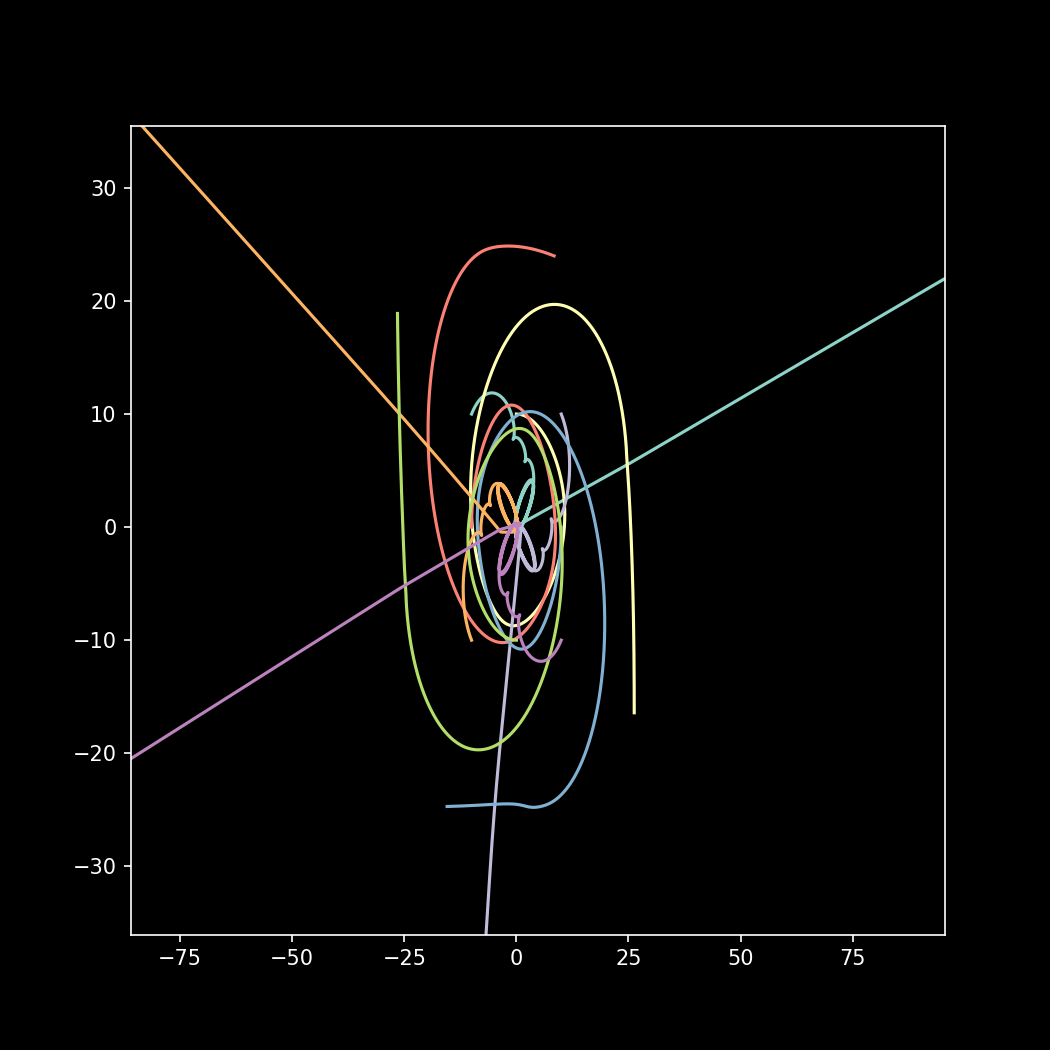

In [27]:
my_Sim_8_Spiral.ShowStatic()

<IPython.core.display.Javascript object>


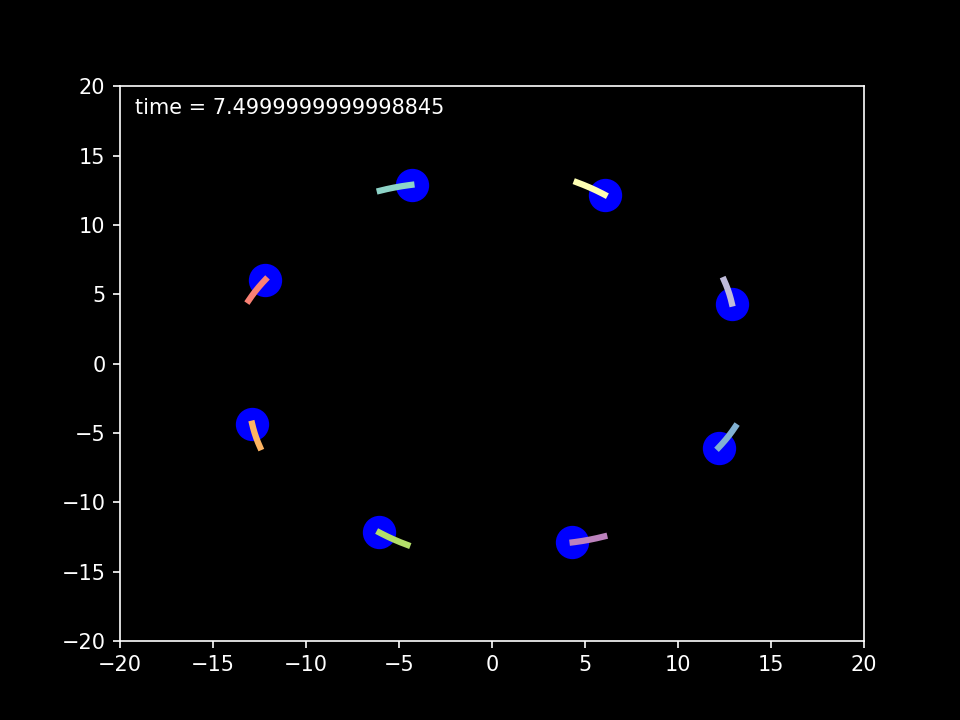

In [28]:
my_Sim_8_Spiral2.sim_name = "8_body_circle"
my_Sim_8_Spiral2.ShowAnimation(size = 20)

<IPython.core.display.Javascript object>


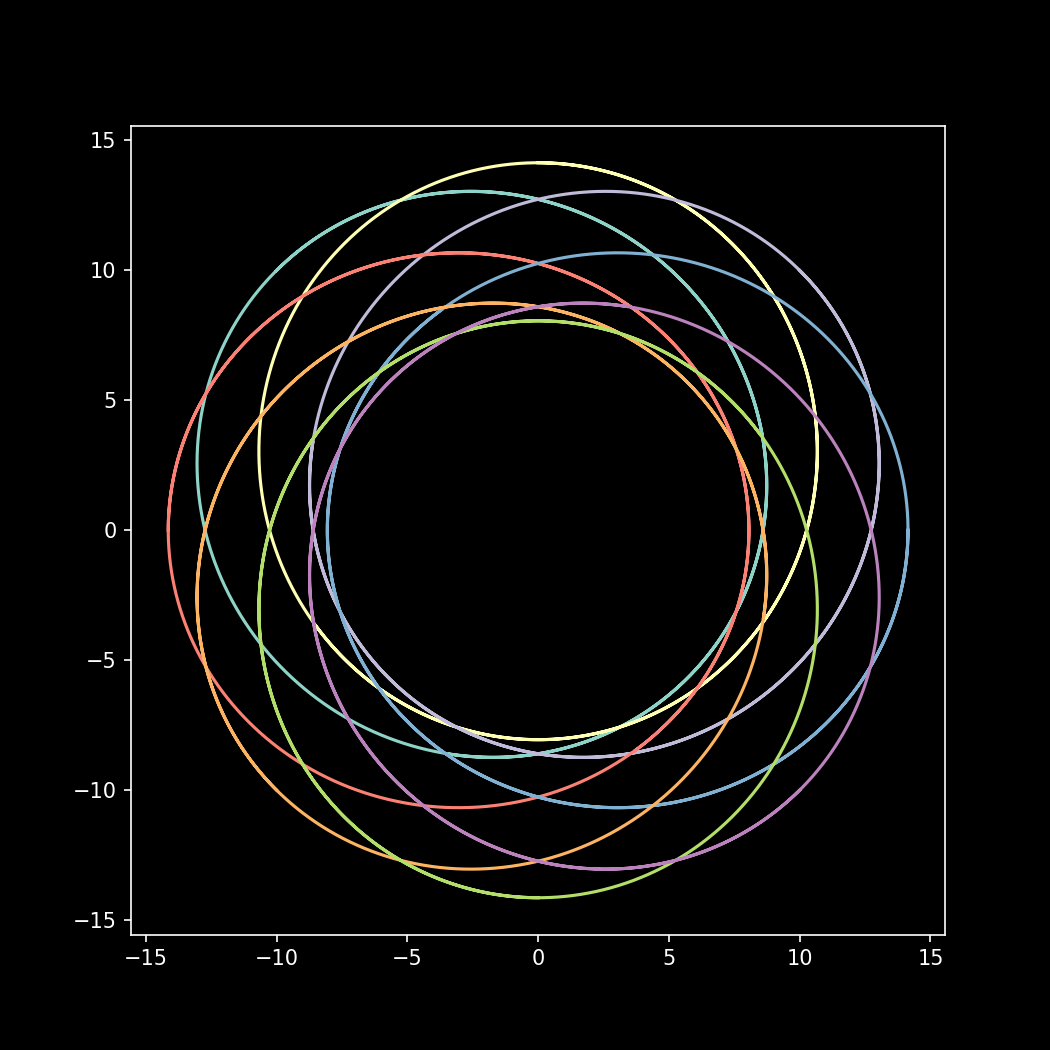

In [29]:
my_Sim_8_Spiral2.ShowStatic()

## Charged Particle n_body problem

We have the Hamiltonian,
> \begin{align*}
H = \sum_{i=1}^n \frac{||p_i||^2}{2m_i}  +  \sum_{(i,j)=(1,1)}^{(n,n)} \zeta_{ij}\frac{kc_ic_j}{||q_i-q_j||}
\end{align*}

Where $k$ is coulomb's constant, with
>$$
\zeta_{ij} =
\begin{cases}
1, i>j\\
0, i\leq j
\end{cases}
$$

This leads to a system of ODE,

> \begin{align*}
\dot{q}_i &= \frac{p_i}{m_i}\\
\dot{p}_i &= \sum_{j\in S_i}\frac{kc_ic_j}{||q_i-q_j||^3}(q_i-q_j)
\end{align*}

Where $S_i = \{1,2,...,n\}/\{i\}$

In [23]:
par_Charge_N_Body = partial(Charge_N_Body, K = 1, dim = 2)
my_Sim_Helium = Simulation(Func_Class = par_Charge_N_Body, Sim_Name="Helium_Sim", Calc_Ham = True)
my_Sim_Helium.speed = 10
a = (70**0.5)/(10)
my_Sim_Helium.AddParts([1000,1, 1], [[0,0],[-100, 0], [2, 0]],
                       [[0,0],[1.323, 0], [0.5, 0]], [500,500, 500], [40,15, 15], [2,-1,-1])
my_Sim_Helium.CalcPath(20)

In [24]:
my_Sim_Helium.CalcHamiltonian()
my_Sim_Helium.Hamiltonian

array([-1.00315784e-02, -1.00315784e-02, -1.00315784e-02, ...,
        2.97300166e+03,  2.97300166e+03,  2.97300166e+03])

<IPython.core.display.Javascript object>


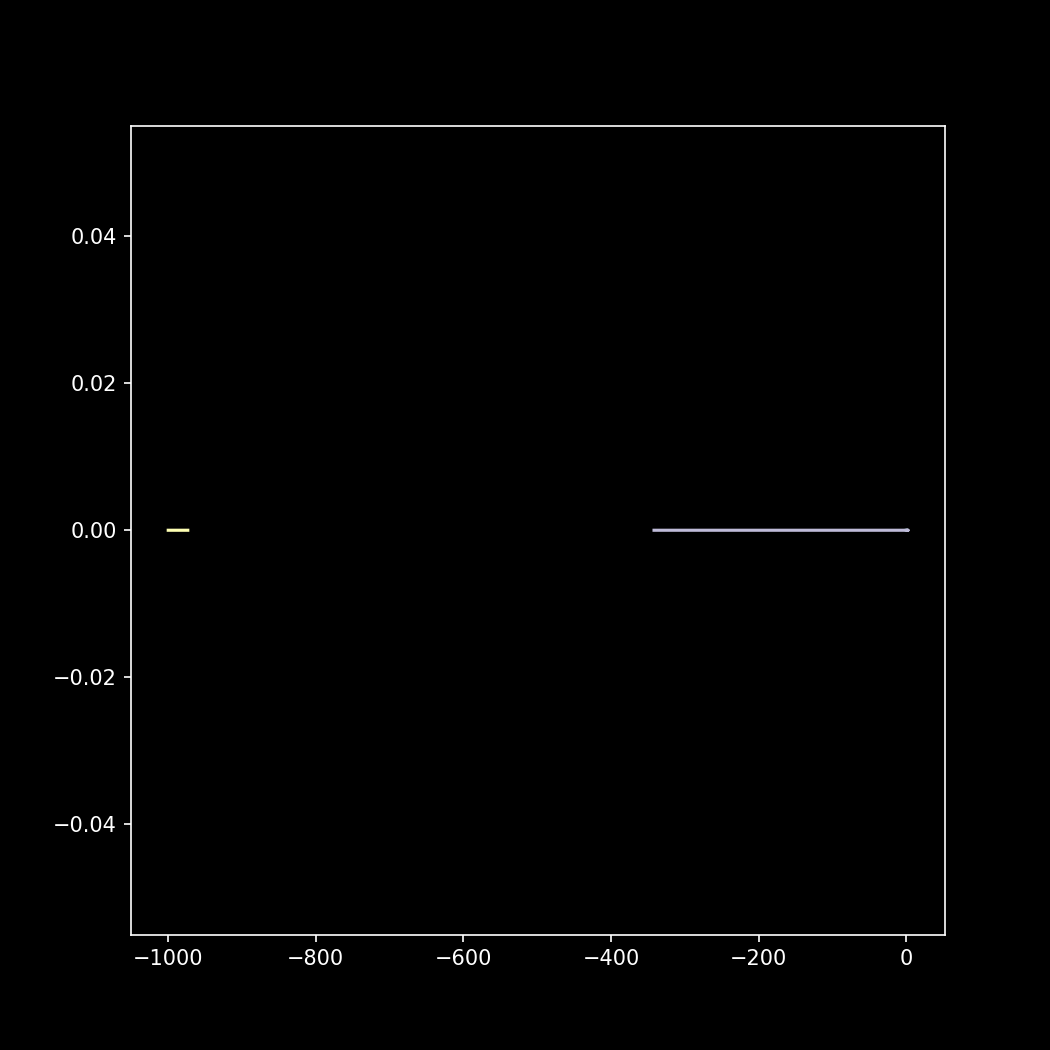

In [16]:
my_Sim_Helium.ShowStatic()

<IPython.core.display.Javascript object>


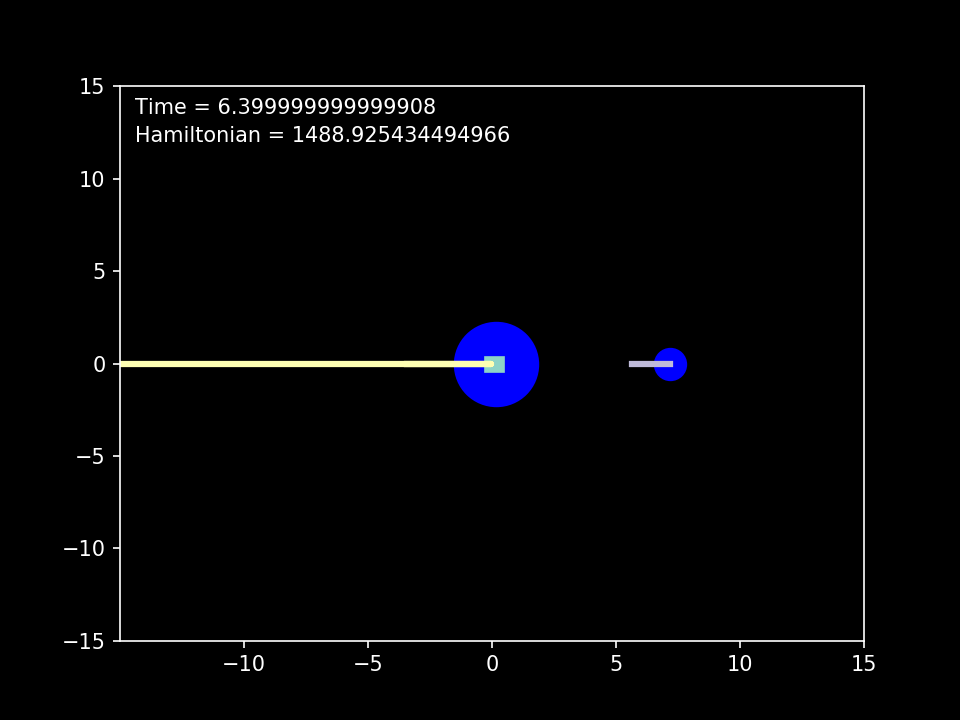

In [84]:
my_Sim_Helium.ShowAnimation()#size = 2)

In [26]:
par_Charge_N_Body = partial(Charge_N_Body, K = 20, dim = 2)
my_Sim_Helium = Simulation(Func_Class = par_Charge_N_Body, Sim_Name="Helium_Sim", Calc_Ham = True)

mass = [100000, 1, 1]
q = np.array([[0,0],[-8,0], [8, 0]])
p = np.array([[0,0],[0, 2], [0, 2]])
charge = [2,-1,-1]


In [29]:
my_Sim_Helium.speed = 10
my_Sim_Helium.AddParts(mass, q,
                       p, [500, 500,500], [30,15, 15], charge)
my_Sim_Helium.CalcPath(100)

<IPython.core.display.Javascript object>


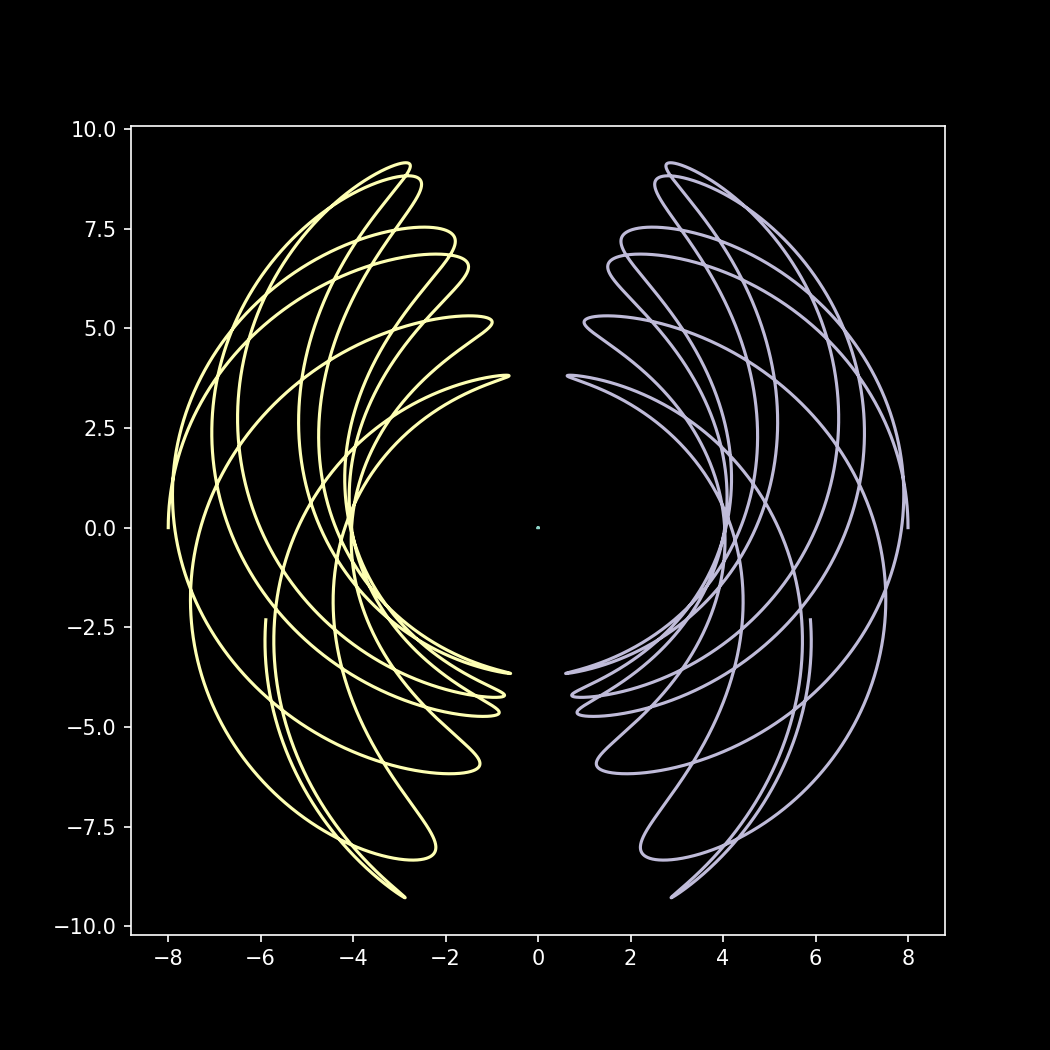

In [31]:
my_Sim_Helium.ShowStatic()#(size = 30)

In [6]:
par_Double_Pendulum = partial(Double_Pendulum, g=9.81, rod_length = [0.5,1])
Double_Pen = Simulation(Func_Class=par_Double_Pendulum, Sim_Name="Double_Pen", Calc_Ham = True)
mass = [1, 1]
q = np.array([[0], [np.pi/2]])
p = np.array([[0],[7]])

Double_Pen.dim = 1

In [7]:
Double_Pen.speed = 4
Double_Pen.AddParts(mass, q,
                       p, [30, 30], [15, 15])
Double_Pen.CalcPath(35)

<IPython.core.display.Javascript object>


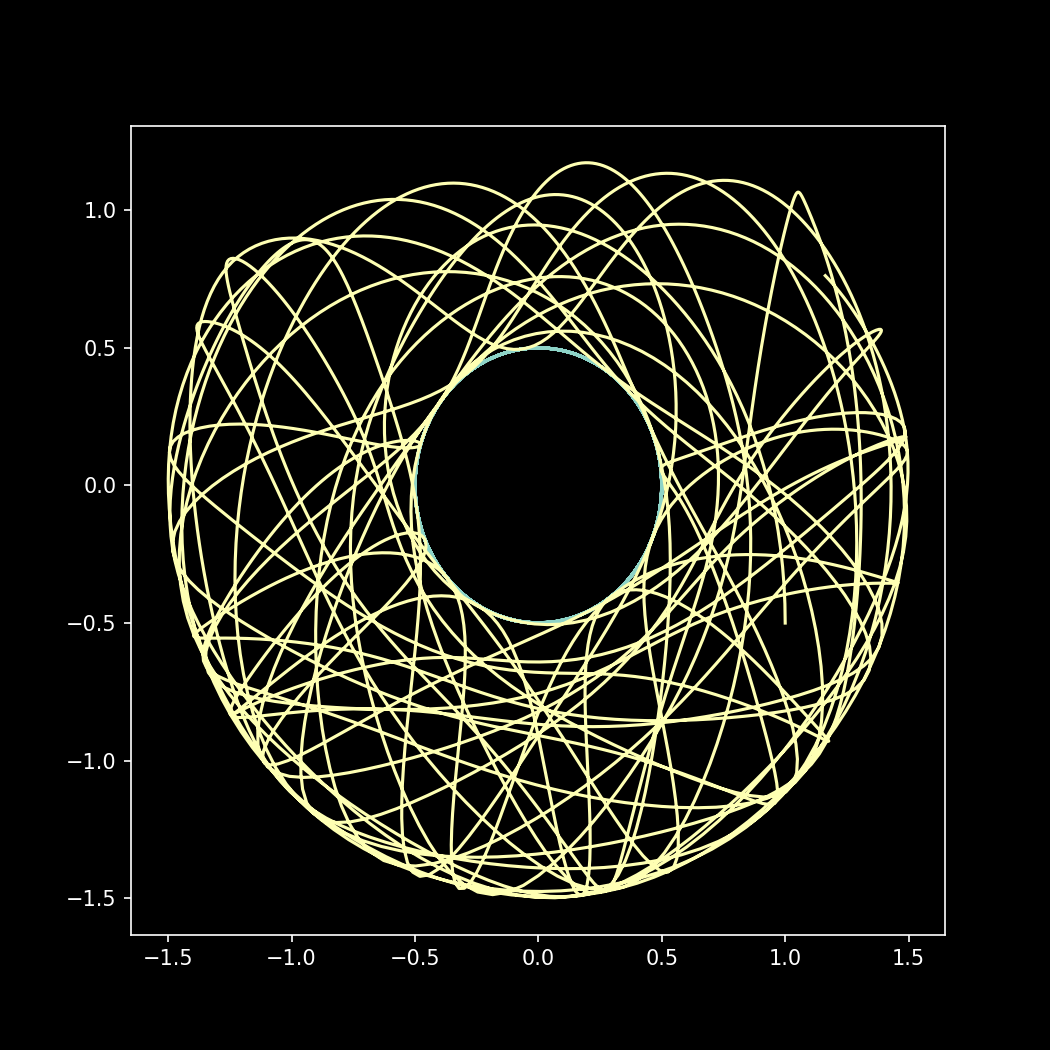

In [8]:
Double_Pen.ShowStatic()

<IPython.core.display.Javascript object>


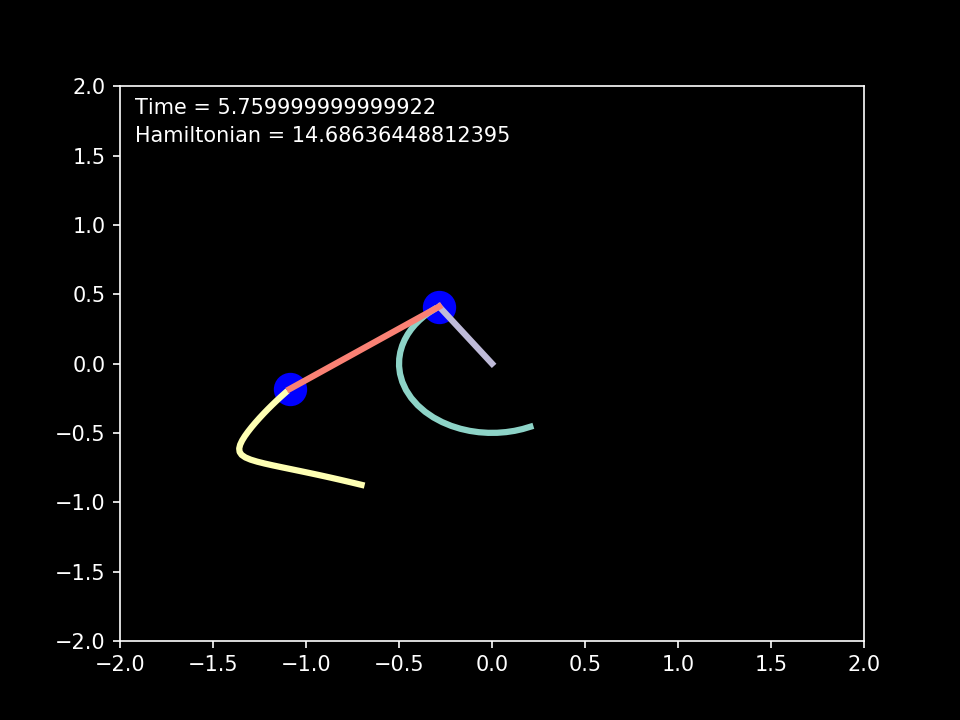

In [9]:
Double_Pen.ShowAnimation(size = 2, follow_mass = -3, link_data = [[0,1],[1,2]])

In [13]:
Double_Pen.ShowAnimation3D(size = 2)

In [14]:
sc_Spring_Pen = partial(Spring_Pen,spring_const = 40, g=9.81, length=1)
Spring_Pen_Sim = Simulation(Func_Class=sc_Spring_Pen,Sim_Name="Spring_Pen", Calc_Ham = True)

mass = [1]
q = np.array([[0, 3*np.pi/4]])
p = np.array([[0,0]])

Spring_Pen_Sim.dim = 2

In [15]:
Spring_Pen_Sim.speed = 2
Spring_Pen_Sim.AddParts(mass, q,
                       p, [40], [15])
Spring_Pen_Sim.CalcPath(40)

<IPython.core.display.Javascript object>


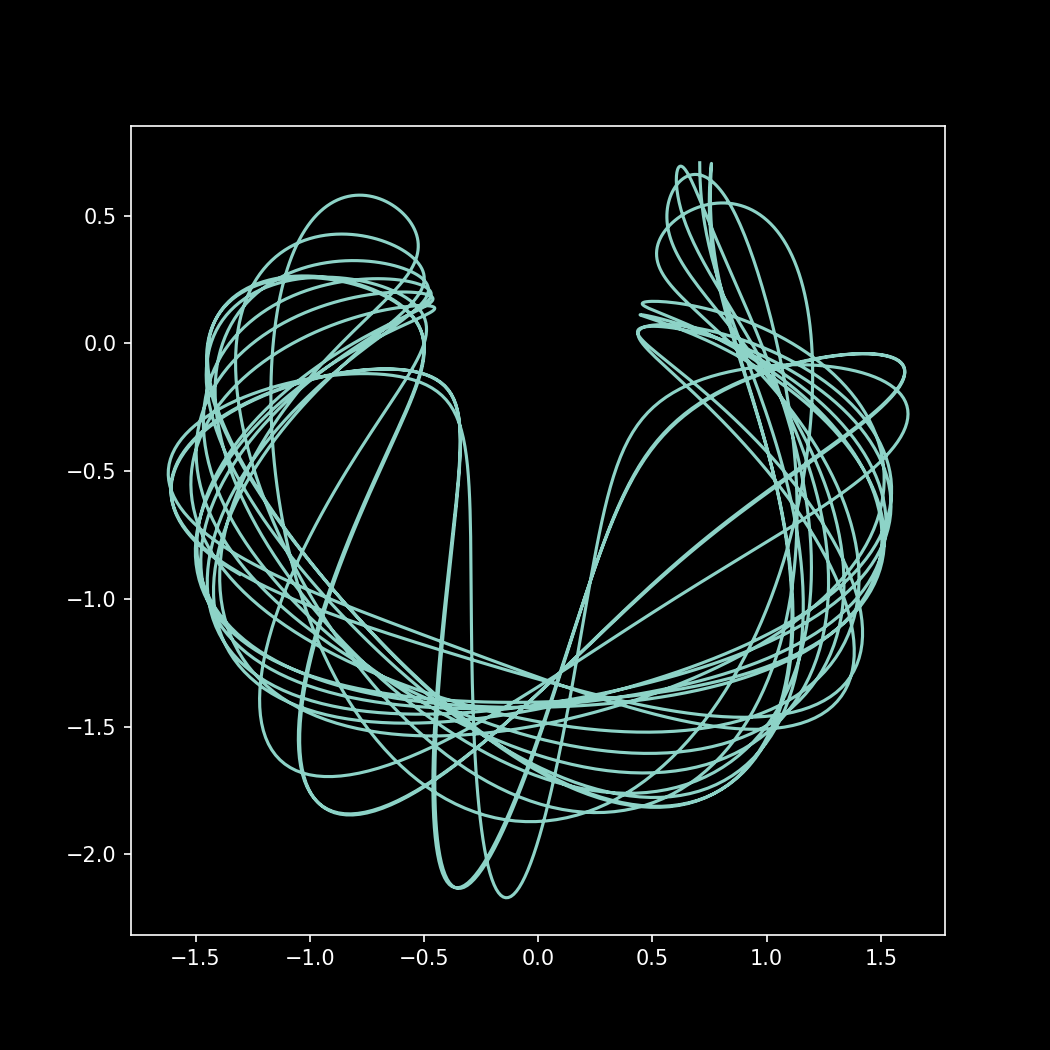

In [16]:
Spring_Pen_Sim.ShowStatic()

<IPython.core.display.Javascript object>


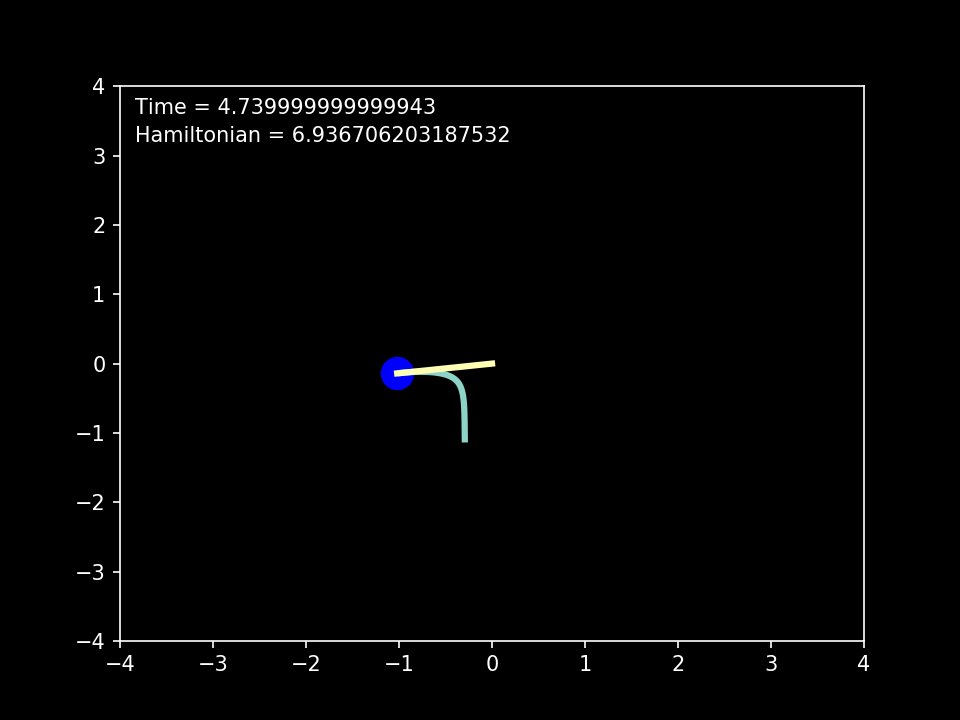

In [17]:
Spring_Pen_Sim.ShowAnimation(size = 4, follow_mass = -3, link_data=[[0,1]])

In [2]:
sc_cone_motion = partial(Motion_In_Cone, g=9.81, alpha=np.pi/4)
Cone_Motion_Sim = Simulation(Func_Class=sc_cone_motion,Sim_Name="Motion_Of_Cone", Calc_Ham = True)

mass = [2]
q = np.array([[3, 0]])#1.5
p = np.array([[0,4]]) #11.508 # then circular orbit

Cone_Motion_Sim.dim = 2


In [3]:
Cone_Motion_Sim.speed = 3
Cone_Motion_Sim.AddParts(mass, q,
                       p, [250], [15])
Cone_Motion_Sim.CalcPath(40)

<IPython.core.display.Javascript object>


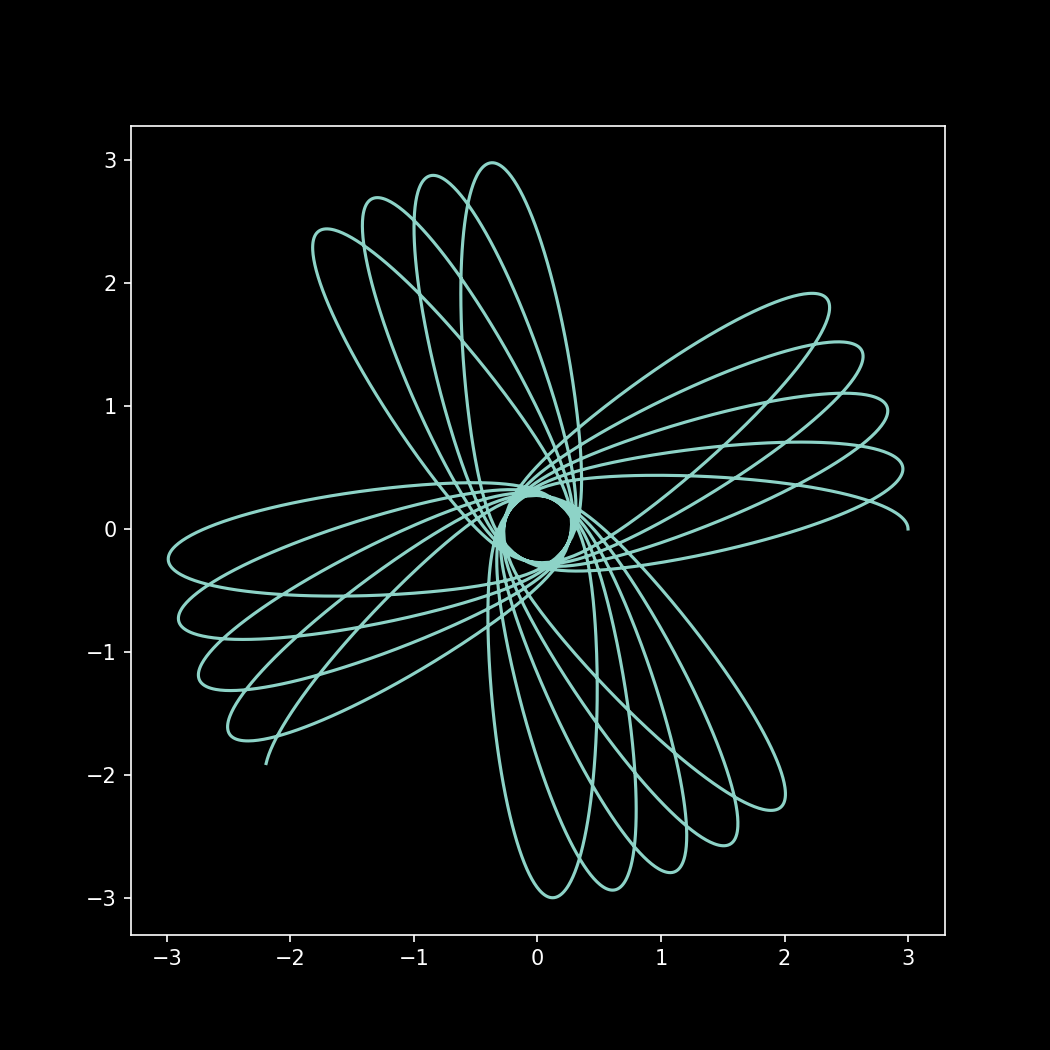

In [4]:
Cone_Motion_Sim.ShowStatic(with_color = False, z_axis = [0,3], save = False)

<IPython.core.display.Javascript object>


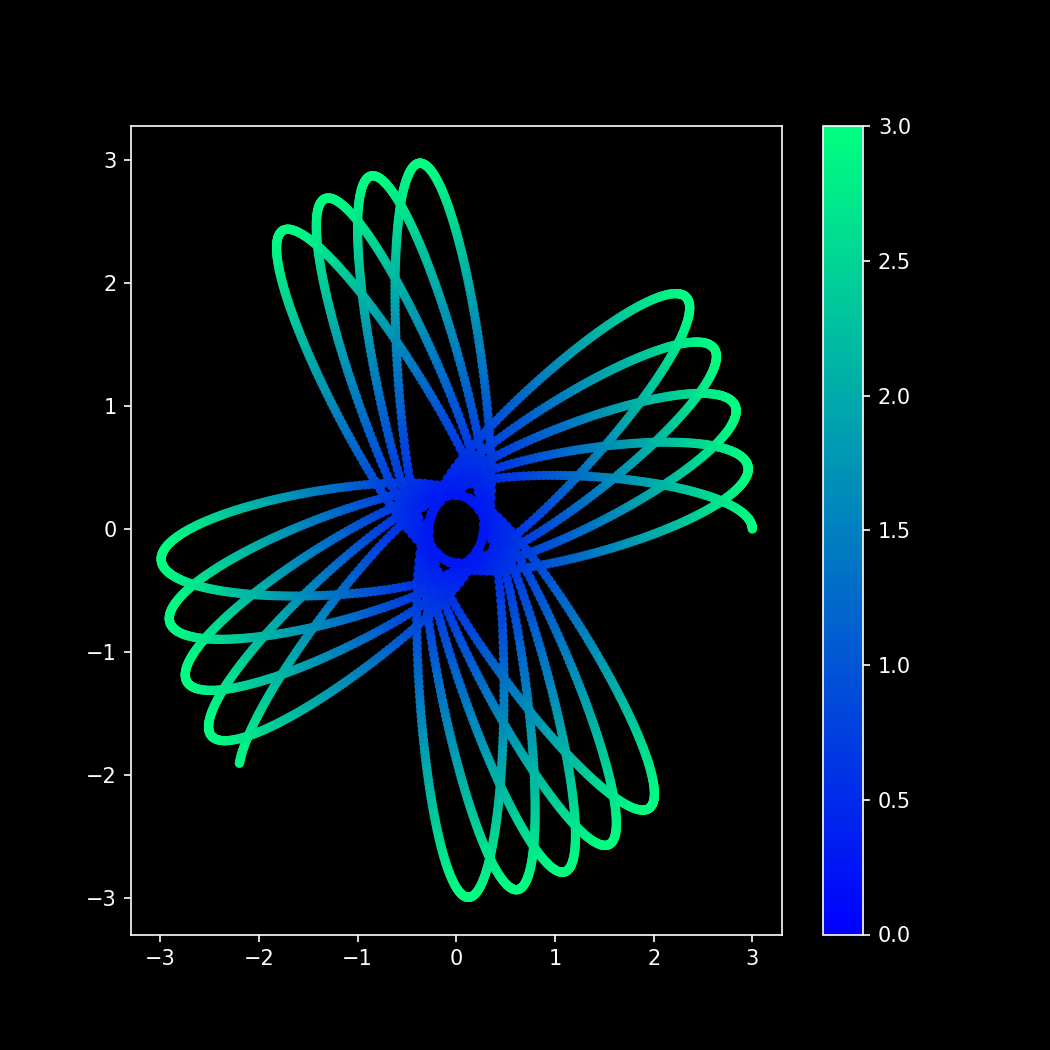

In [5]:
Cone_Motion_Sim.ShowStatic(with_color = True, z_axis = [0,3], save = False)

<IPython.core.display.Javascript object>


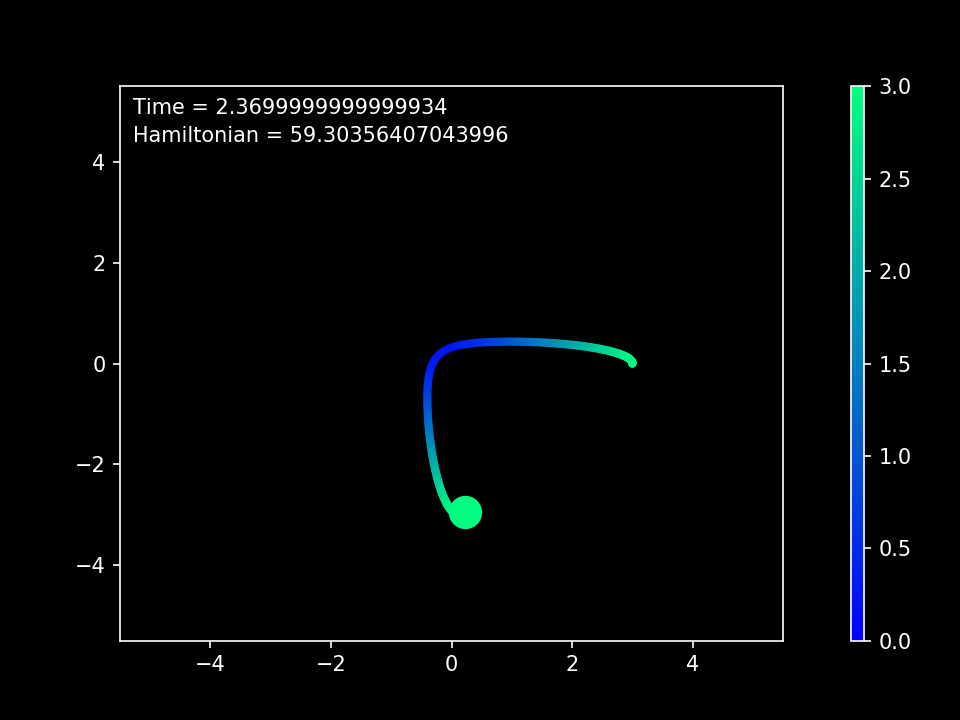

In [6]:
Cone_Motion_Sim.ShowAnimation(size = 5.5, follow_mass = -3, with_color = True, z_axis=[0,3], max_dots = 800, save = False)

In [15]:
Cone_Motion_Sim.ShowAnimation3D(size = 5)

# Custom Hamiltonian

## Motion in Cone

In [2]:
R, O, a = sp.symbols(r'R \theta \alpha')
a = sp.pi/4
r = [R*sp.cos(O), R*sp.sin(O), R/sp.tan(a)]
par_Custom_System = partial(Custom_System,[r], [R, O], [2], linear_grav = 2)

In [3]:
Cone_Sim = Simulation(par_Custom_System, Calc_Ham = True)

In [4]:
Cone_Sim.speed = 4
q = np.array([3,0])
p = np.array([0,4])
Cone_Sim.AddParts([2], q,
                       p, [300], [15])
Cone_Sim.CalcPath(35)

<IPython.core.display.Javascript object>


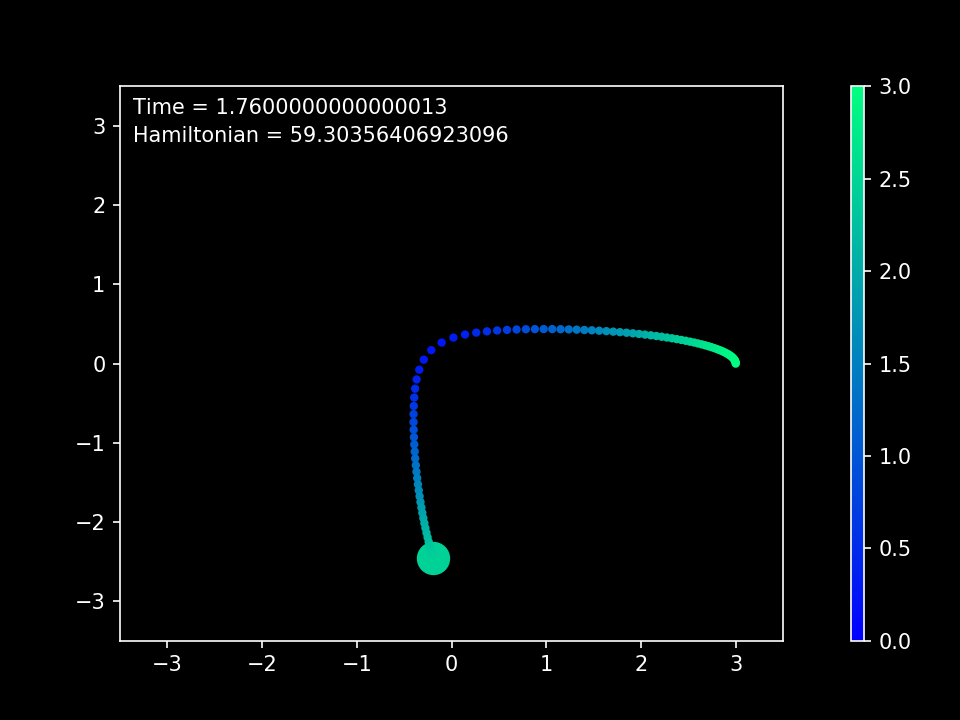

In [5]:
Cone_Sim.ShowAnimation(size = 3.5, z_axis = [0,3], with_color = True, follow_mass=-3)

## Double Pendulum 

In [6]:
#Define needed variables
O1, O2, O3 = sp.symbols(r'\theta_1 \theta_2 \theta_3')
l1, l2, l3 = 1.5,0.5,1 #sp.symbols(r'l_1 l_2 l_3')


#Define the cords
r1 = [sp.sin(O1)*l1, -sp.cos(O1)*l1]
r2 = [sp.sin(O1)*l1 + sp.sin(O2)*l2, -sp.cos(O1)*l1 - sp.cos(O2)*l2]
r3 = [sp.sin(O1)*l1 + sp.sin(O2)*l2 + sp.sin(O3)*l3, -sp.cos(O1)*l1 - sp.cos(O2)*l2 - sp.cos(O3)*l3]

#Put into system to calc Ham equations
par_Custom_System = partial(Custom_System, [r1, r2], [O1, O2], [3,1], linear_grav = 1)


In [7]:
Double_Pen_Sim = Simulation(par_Custom_System, Calc_Ham = True)
Double_Pen_Sim.CalcEquations()

In [8]:
Double_Pen_Sim.speed = 4
q = np.array([np.pi/2,np.pi/4])
p = np.array([0,1])
Double_Pen_Sim.AddParts([3,1], q,
                       p, [300,300], [15,15])
Double_Pen_Sim.CalcPath(35)

<IPython.core.display.Javascript object>


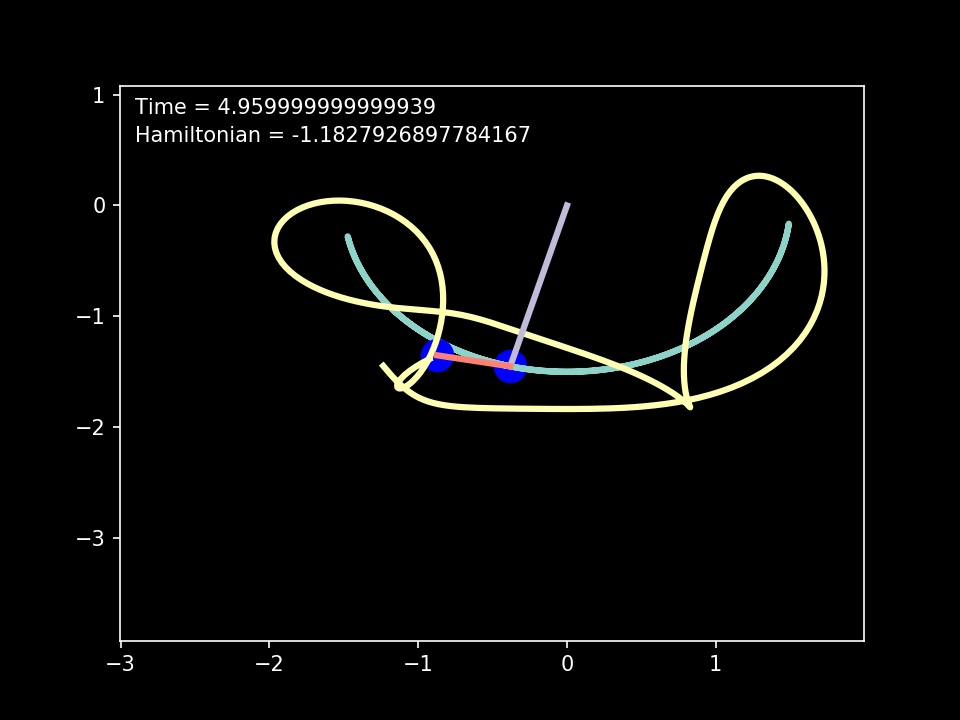

In [9]:
Double_Pen_Sim.ShowAnimation(link_data = [[0,1],[1,2]], size = 2.5)

## Spring

In [10]:
x1, x2 = sp.symbols(r'x_1 x_2', real = True)
l1, k1, l2, k2 = sp.symbols(r'l_1 k_1 l_2 k_2', real = True)

r1 = [-l1 - x1]
r2 = [-l1 - x1 -l2 -x2]

In [89]:
dot_q, dot_p = Get_Ham_Equations([r1, r2], [x1, x2],
                                 linear_grav = -1, elastic_data=[[[[0],0],[k1,l1]], [[0,1],[k2,l2]]],
                                 show_working=True)

In [10]:
x1, x2 = sp.symbols(r'x_1 x_2', real = True)
l1, k1, l2, k2 = 3,10,6,15#sp.symbols(r'l_1 k_1 l_2 k_2', real = True)
r1 = [-l1 - x1]
r2 = [-l1 - x1 -l2 -x2]
par_Custom_System = partial(Custom_System, [r1, r2], [x1,x2], [3,3],
                            linear_grav = 0, elastic_data=[[[[0],0],[k1,l1]], [[0,1],[k2,l2]]])

In [11]:
Spring_Sim = Simulation(par_Custom_System)

In [12]:
Spring_Sim.speed = 4
q = np.array([0.5,1.5]) # extenion not greater than lenght of string
p = np.array([0,0])
Spring_Sim.AddParts([3,3], q,
                       p, [300,300], [15,15])
Spring_Sim.CalcPath(35)

<IPython.core.display.Javascript object>


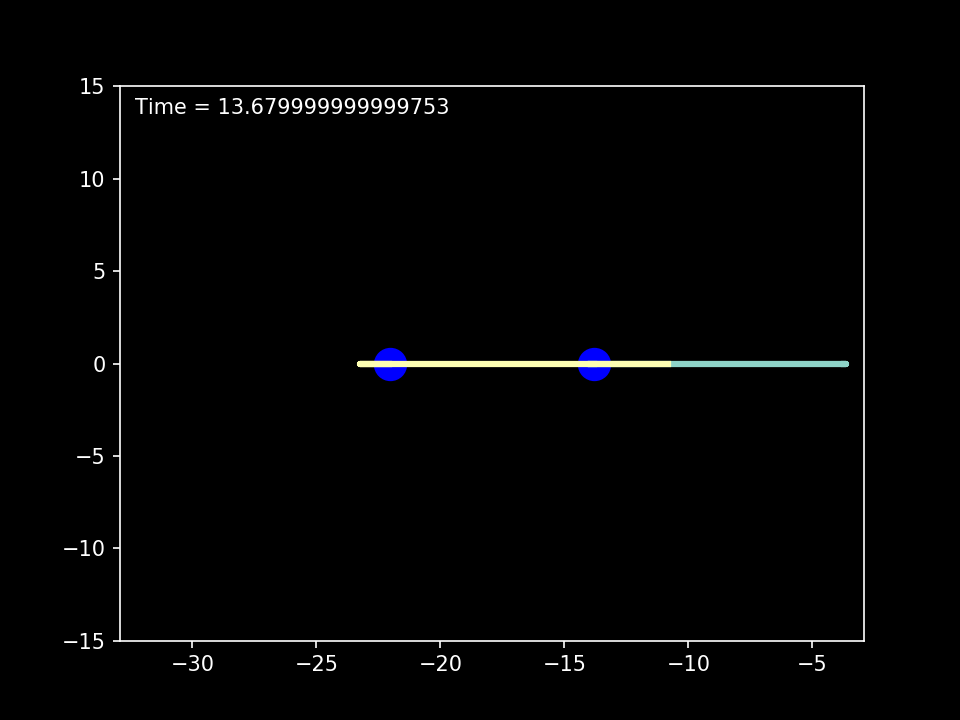

In [13]:
Spring_Sim.ShowAnimation()

## Double Spring Pendulum

In [10]:
#Define needed variables
O1, O2, O3 = sp.symbols(r'\theta_1 \theta_2 \theta_3')

x1, x2, x3 = sp.symbols(r'x_1 x_2 x_3')

l1, l2, l3 = 2,3,3 #sp.symbols(r'l_1 l_2 l_3')
k1, k2, k3 = 15,20,25

elastic1 = [[[0,0],0],[k1,l1]]
elastic2 = [[0,1],[k2,l2]]
elastic = [elastic1, elastic2]

#Define the cords
r1 = [sp.sin(O1)*(l1+x1), -sp.cos(O1)*(l1+x1)]
r2 = [sp.sin(O1)*(l1+x1) + sp.sin(O2)*(l2+x2), -sp.cos(O1)*(l1+x1) - sp.cos(O2)*(l2+x2)]
r3 = [sp.sin(O1)*l1 + sp.sin(O2)*l2 + sp.sin(O3)*l3, -sp.cos(O1)*l1 - sp.cos(O2)*l2 - sp.cos(O3)*l3]

#Put into system to calc Ham equations
par_Custom_System = partial(Custom_System, [r1, r2], [O1, O2, x1, x2],
                            [3,1], linear_grav = 1, elastic_data = elastic)

In [11]:
Double_Spring_Sim = Simulation(par_Custom_System, Calc_Ham = True)
Double_Spring_Sim.CalcEquations()

In [12]:
Double_Spring_Sim.speed = 4
q = np.array([np.pi/4,0, 0,0]) # extenion not greater than lenght of string
p = np.array([0,0,0,0])
Double_Spring_Sim.AddParts([3,1], q,
                       p, [300,300], [15,15])
Double_Spring_Sim.CalcPath(15)

<IPython.core.display.Javascript object>


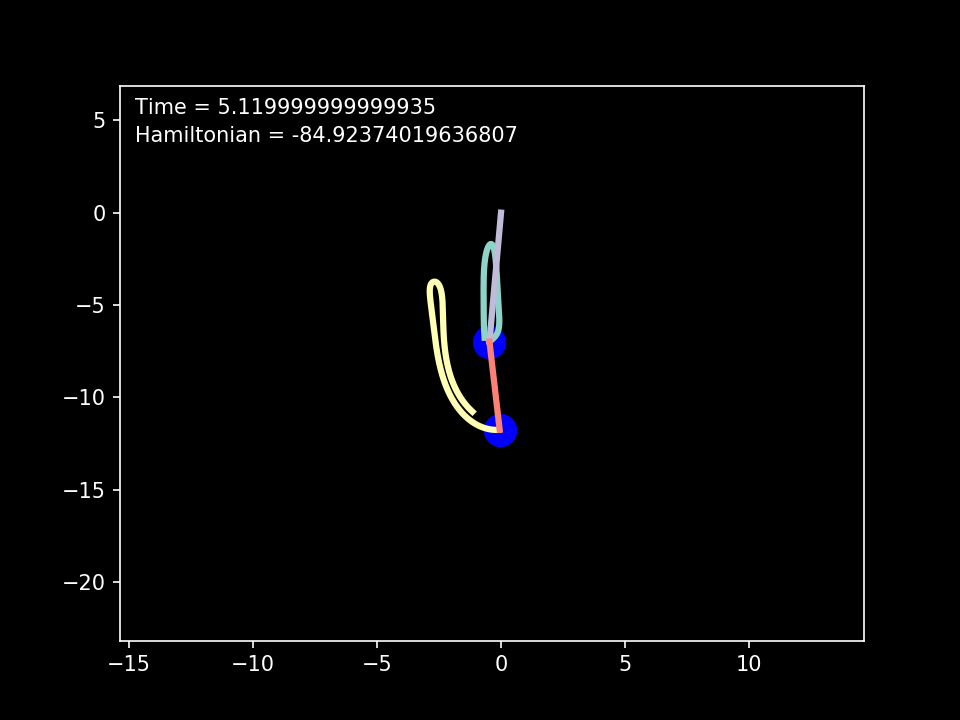

In [13]:
Double_Spring_Sim.ShowAnimation(link_data = [[0,1],[1,2]])

## Planets

In [2]:
x1, x2, x3, y1, y2, y3 = sp.symbols(r'x_1 x_2 x_3 y_1 y_2 y_3')
r1 = [x1,y1] 
r2 = [x2,y2]
r3 = [x3,y3]
par_Custom_System = partial(Custom_System, [r1, r2, r3], [x1, y1, x2, y2, x3, y3],
                            [1,1,30], linear_grav = -1, radial_gravity = True)

In [3]:
Grav_3_Body_Sim = Simulation(par_Custom_System, Calc_Ham = True)
Grav_3_Body_Sim.CalcEquations()

In [16]:
radial_gravity_PE([r1,r2,r3], [1,1,1], 1)

((x_1 - x_2)**2 + (y_1 - y_2)**2)**(-0.5) + ((x_1 - x_3)**2 + (y_1 - y_3)**2)**(-0.5) + ((x_2 - x_3)**2 + (y_2 - y_3)**2)**(-0.5)

In [6]:
Grav_3_Body_Sim.speed = 4
q = [5,5,-5,-5,0,0]
p = [1,-1,-1,1,0,0]
Grav_3_Body_Sim.AddParts([1,1,30], q, p, [300,300,300], [15,15,15])
Grav_3_Body_Sim.CalcPath(20)

<IPython.core.display.Javascript object>


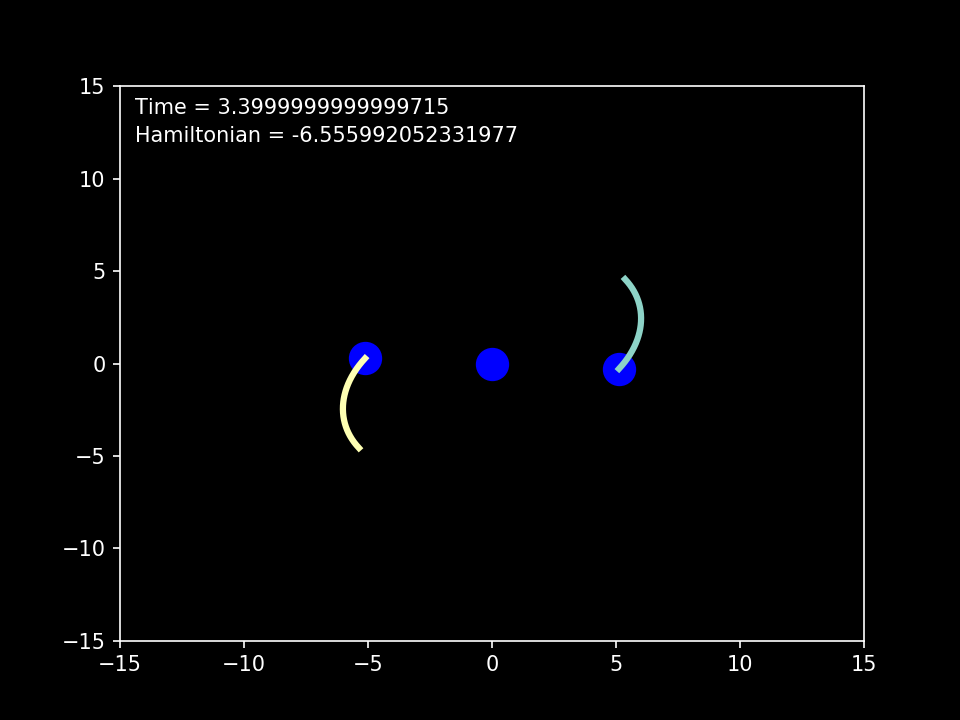

In [7]:
Grav_3_Body_Sim.ShowAnimation()

## Charged Particles

In [32]:
x1, x2, x3, y1, y2, y3 = sp.symbols(r'x_1 x_2 x_3 y_1 y_2 y_3')
r1 = [x1,y1] 
r2 = [x2,y2]
r3 = [x3,y3]
par_Custom_System = partial(Custom_System, [r1, r2, r3], [x1, y1, x2, y2, x3, y3],
                            [1,1,30], charge = [-1,-1,2], radial_charge = True, K = 20)

In [33]:
Charge_3_Body_Sim = Simulation(par_Custom_System, Calc_Ham = True)
Charge_3_Body_Sim.CalcEquations()

In [38]:
Charge_3_Body_Sim.speed = 10
q = [8,0,-8,0,0,0]
p = [0,2,0,2,0,0]
Charge_3_Body_Sim.AddParts([1,1,30], q, p, [300,300,300], [15,15,15])
Charge_3_Body_Sim.CalcPath(50)

<IPython.core.display.Javascript object>


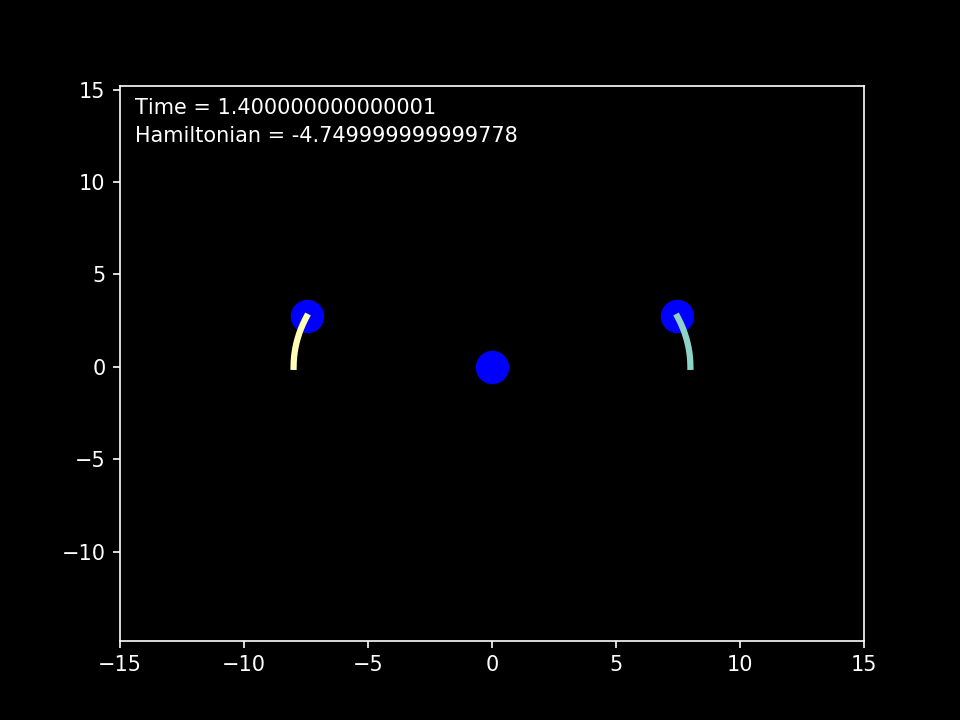

In [39]:
Charge_3_Body_Sim.ShowAnimation()

# 3D animation

## Gravity n-body

In [4]:
#4 body system
mass = [15]*3
q_0 = [[-10,10],[10,10],[10,-10]]
p_0 = [[3,3],[3,-3],[-3,-3]]
trace_len = [200]*3
size = [15]*3
par_Grav_N_Body = partial(Grav_N_Body, G = 1, dim =2)
my_Sim_2D = Simulation(par_Grav_N_Body)
my_Sim_2D.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_2D.CalcPath(100)

In [5]:
my_Sim_2D.ShowAnimation3D()

In [58]:
#my_Sim_4_Orbit.speed = 30
#my_Sim_4_Orbit.sim_name = "4_body_spiral"
#my_Sim_4_Orbit.ShowAnimation(size = 20)

In [6]:
#using class that got created
mass = [15]*3
q_0 = [[-10,10,10],[10,10,0],[10,-10,-10]]
p_0 = [[3,3,3],[3,-3,-3],[-3,-3,-3]]
trace_len = [200]*3
size = [15]*3
par_Grav_N_Body = partial(Grav_N_Body, G = 1, dim =3)
my_Sim_3D = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_3D.dim = 3
my_Sim_3D.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_3D.CalcPath(100)

<IPython.core.display.Javascript object>


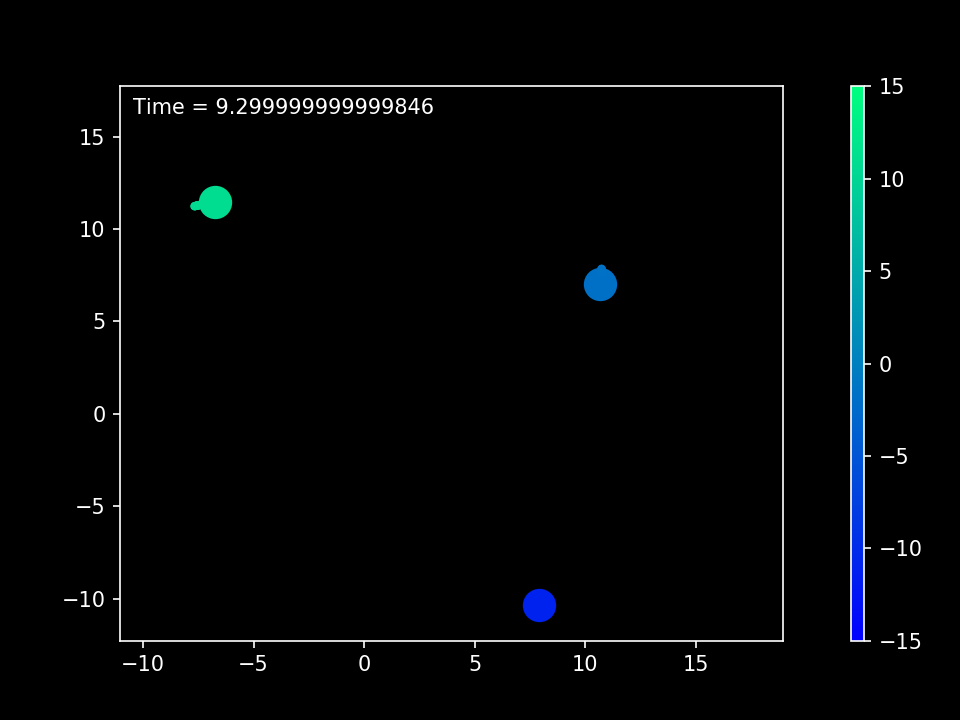

In [7]:
my_Sim_3D.ShowAnimation(z_axis=[-15, 15], with_color=True)

In [8]:
my_Sim_3D.ShowAnimation3D()

## Charged n-body

In [9]:
par_Charge_N_Body = partial(Charge_N_Body, K= 1, dim=3)
my_Sim_Helium_3D = Simulation(Func_Class = par_Charge_N_Body,Sim_Name="Helium_Sim")
my_Sim_Helium_3D.speed = 15
my_Sim_Helium_3D.dim = 3
my_Sim_Helium_3D.AddParts([1000,1, 1], [[0,0,0],[-7, 0,0], [7, 0,0]],
                       [[0,0,0],[0, 0,0.5], [0, -0.5,0]], [500,500, 500], [40,15, 15], [2,-1,-1])
my_Sim_Helium_3D.CalcPath(40)

In [10]:

my_Sim_Helium_3D.ShowAnimation3D()

In [56]:
ipv.movie('wave.gif', frames = 100, fps = 15)

Output()

# Charged 2 Body System, (Nucleus has infinite mass)

## Equations with Singularities At $\alpha = 0, \pi/2$

In [397]:
q = [[np.pi/4,np.pi,0]]
p = [[0,0.1,-(2**0.5*(4*2-1))**0.5]]

Two_Electrons_Near_TCP(0).calc_H_bar(*q[0][0:2], *p[0])

0.020000000000000462

In [398]:
par_Two_Electrons_Near_TCP = partial(Two_Electrons_Near_TCP, is_eze = False)
my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_TCP,Sim_Name="Helium_Sim")

my_Sim_Helium.speed = 9
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], q, p, Track_Length = [2000])
my_Sim_Helium.CalcPath(20)

<IPython.core.display.Javascript object>


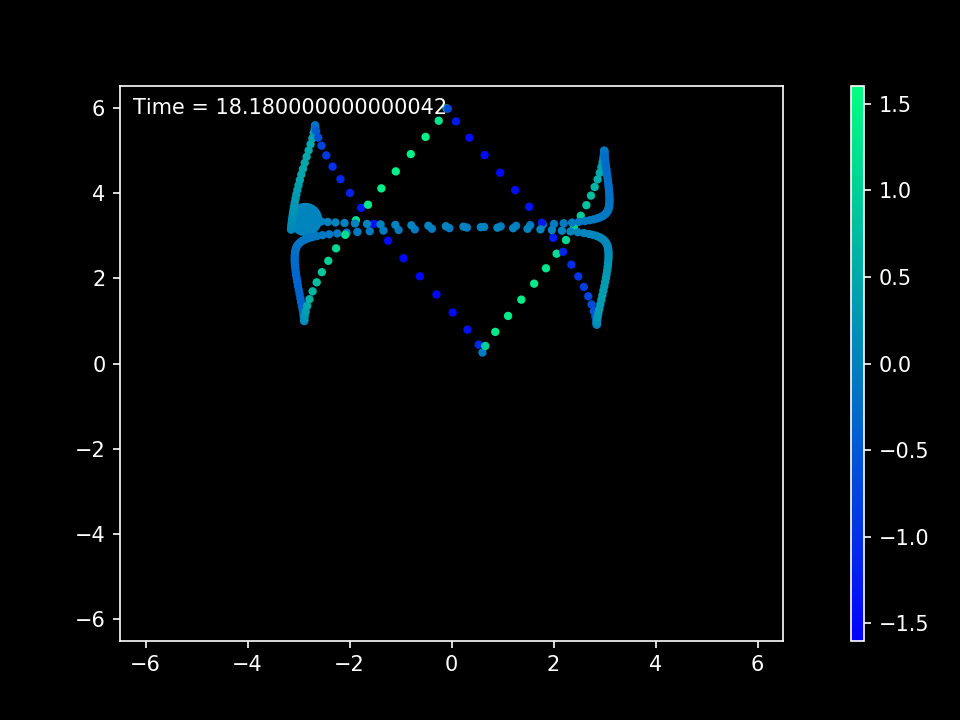

In [399]:
my_Sim_Helium.ShowAnimation(size = 6.5, with_color=True, z_axis = [-1.6,1.6], follow_mass=-3, max_dots= 300)

<IPython.core.display.Javascript object>


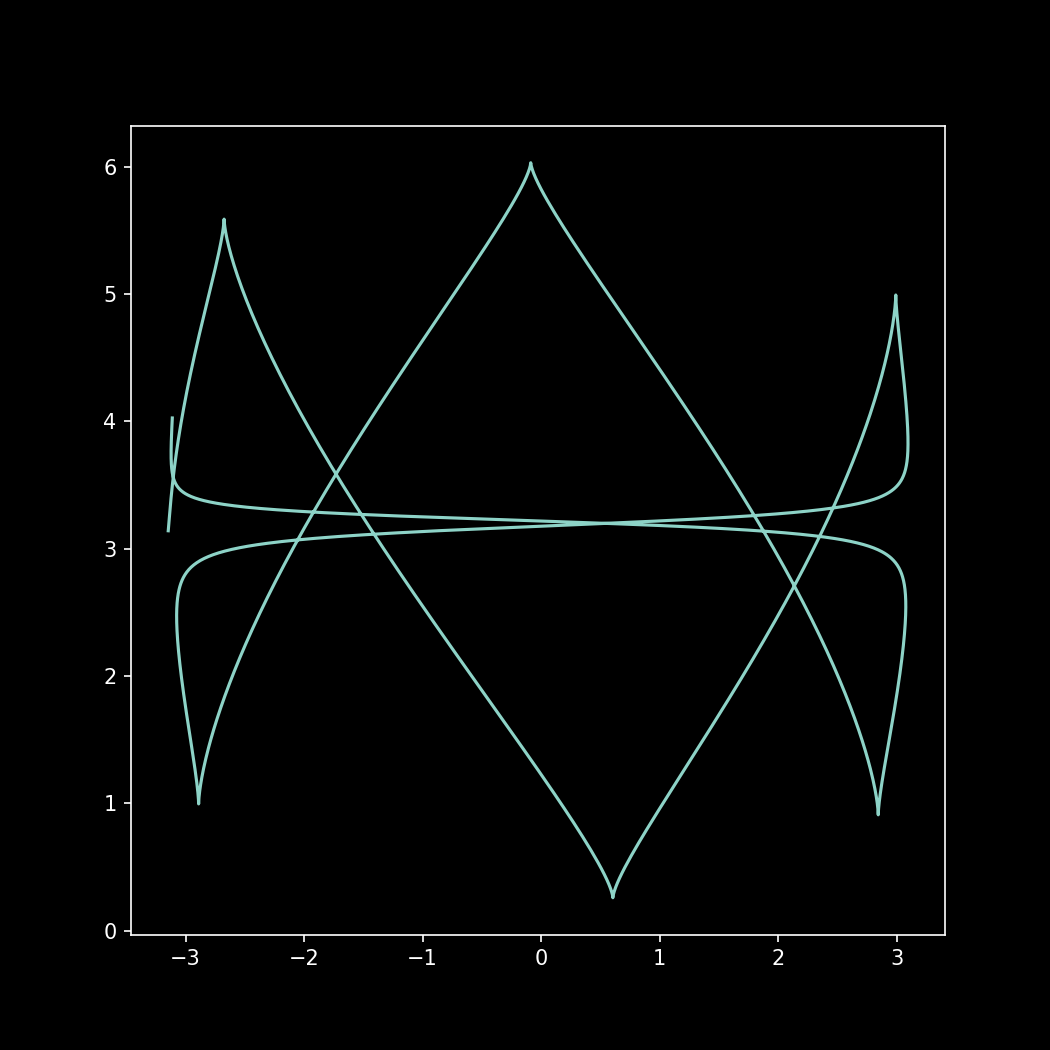

In [400]:
my_Sim_Helium.ShowStatic()

In [401]:
q = [[np.pi/4+0000.1,np.pi,0]]
p = [[0,0,-(2**0.5*(4*2-1))**0.5]]

Two_Electrons_Near_TCP(0).calc_H_bar(*q[0][0:2], *p[0])

-0.08266805693407164

In [402]:
my_Sim_Helium = Simulation(Func_Class = Two_Electrons_Near_TCP,Sim_Name="Helium_Sim")

my_Sim_Helium.speed = 9
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], q, p, Track_Length = [2000])
my_Sim_Helium.CalcPath(20)

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:425: RuntimeWarning: overflow encountered in double_scalars
  dot_q[0][2] = pR*H_bar
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:449: RuntimeWarning: overflow encountered in double_scalars
  H_bar = (1/2)*(pR**2+pa**2+(pO**2)/(np.cos(a)**2*np.sin(a)**2)) + self.V(a,O)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:428: RuntimeWarning: overflow encountered in double_scalars
  temp = (pO**2)*((np.cos(a)**2 - np.sin(a)**2)/(np.sin(a)**3*np.cos(a)**3))
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:429: RuntimeWarning: overflow encountered in double_scalars
  dot_p[0][0] = -(1/2)*pR*pa + temp - self.par_alpha_V(a, O)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:42

<IPython.core.display.Javascript object>


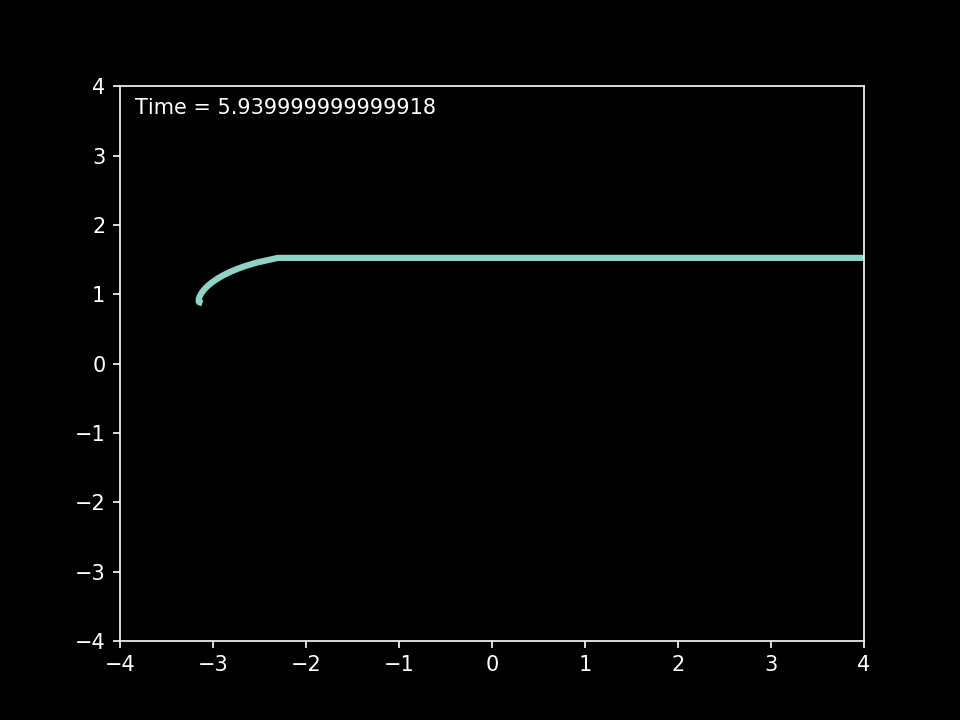

In [403]:
my_Sim_Helium.ShowAnimation(size = 4, with_color=False, z_axis = [-1.6,1.6], follow_mass=-3, max_dots= 300)

In [18]:
# as can be seen when alpha is pi/2 a binary colision occurs and this set of equations can't deal with it.

In [420]:
#Stable of DEP in WR
q = np.array([np.pi/4,np.pi,0])
p = np.array([0,0,(2**0.5*(4*2-1))**0.5])

delta = 1e-1
q = [q + np.array([0,0.9786,0])*delta]
p = [p + np.array([0,-0.1924+0.0728j, 0])*delta]


my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_TCP,Sim_Name="Helium_Sim")

my_Sim_Helium.speed = 9
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], q, p, Track_Length = [2000])
my_Sim_Helium.CalcPath(-10)

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\ODEAnalysis.py:221: ComplexWarning: Casting complex values to real discards the imaginary part
  x[0] = x_0


<IPython.core.display.Javascript object>


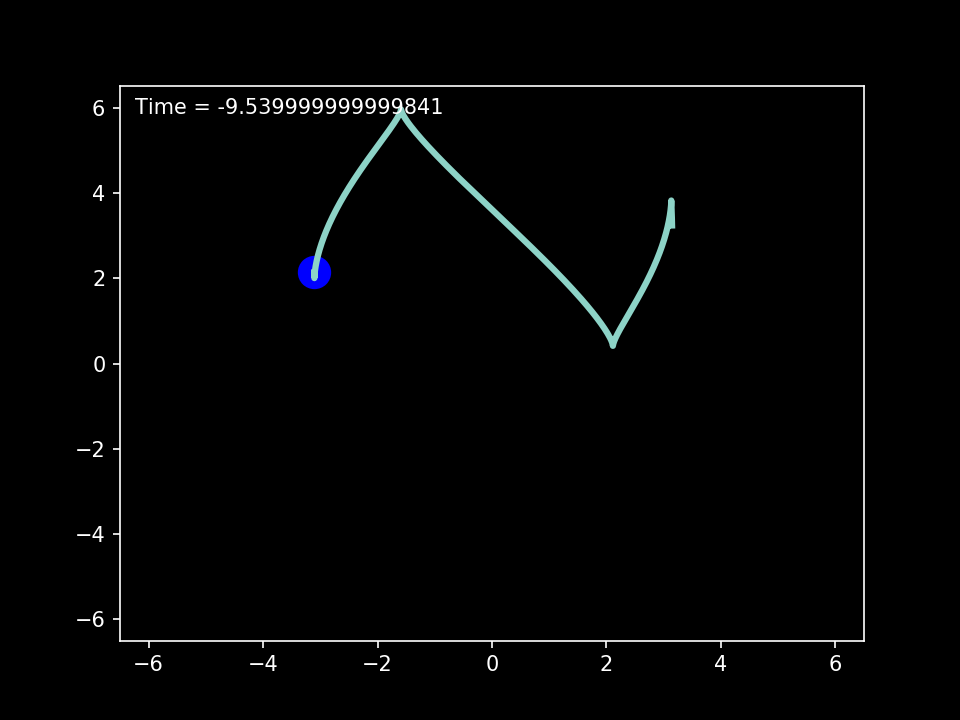

In [421]:
my_Sim_Helium.ShowAnimation(size = 6.5, with_color=False, z_axis = [-1.6,1.6], follow_mass=-3, max_dots= 300)

## Non Singular Equations (E = 0)

In [19]:
Q = [[0,-1,1,0]]
P = [[10**0.5, 0,0, 10**0.5]]
'''E = -1
x_1 = -1, y_1 = 0
x_2 = 1, y_2 = 0
p_x_1 = p_x_2 = 0
p_y_1 = p_y_2 = sqrt(10)/2'''

'E = -1\nx_1 = -1, y_1 = 0\nx_2 = 1, y_2 = 0\np_x_1 = p_x_2 = 0\np_y_1 = p_y_2 = sqrt(10)/2'

In [11]:
q = [[-3.375,0],[3.375,0]]
p = [[0.27217,0],[0,0]]
Q = [0., 1.83711731, 1.83711731, 0.]
Q_bar = [0, 0.84089642, 0.84089642, 0]
P = [ 0., -1.00001643,  0. ,  0.  , -1.]
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-0.9999987825870369

In [21]:
a = (70**0.5)/(10)
q = [[-5,0],[5,0]]
p = [[a,0],[-a,0]]
Q = [[0., 2.23606798, 2.23606798, 0.]]
Q_bar = [[0, 0.84089642, 0.84089642, 0]]
P = [[ 0., -3.74165739,  -3.74165739 ,  0.  ]]
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

2.7755575615628914e-17

In [22]:
q = [[-5,0],[5,0]]
p = [[1,0],[-0.632,0]]
Q = [[0., 2.23606798, 2.23606798, 0.]]
P = [[ 0., -4.47213595, -2.82638992 ,  0.  ]]
Q_bar = [[0, 0.84089642, 0.84089642, 0]]
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-0.0002880000000000382

In [23]:
q = [[0,-5],[0,5]]
p = [[0,0.5],[0,1.072]]
Q = [[-1.58113883, 1.58113883, 1.58113883, 1.58113883]]
P = [[1.58113883, -1.58113883, 3.38996165, 3.38996165]]
Q_bar = [[-0.59460356, 0.59460356, 0.59460356, 0.59460356]]
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-0.0004079999999999362

In [24]:
q = [[100,0],[0.001,0]]
p = [[0,0],[0,0]]
Q = [[10, 0, 0.03162278, 0.]]
P = [[ 0., 0,  0 ,  0.  ]]
Q_bar = [[1, 0, 0.00316228, 0]]
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-2000.009999899999

In [10]:
#r1 comming in from long way away
q = [[-100,0],[2,0]]
p = [[1.323,0],[-0.5,0]]
Q,P,Q_bar = Two_Electron_Non_Singular(0).cart_to_QP(q,p)
Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-0.010031578431372666

In [171]:
q = [[-100,0],[2,0]]
p = [[2**0.5,0],[0,0]]
Q,P,Q_bar, E = Two_Electron_Non_Singular(0).cart_to_QP(q,p)

Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

-0.010196078431372345

In [183]:
q = [[-1000,0],[1000,0]]
p = [[0,1],[0,0]]
Q,P,Q_bar, E = Two_Electron_Non_Singular(0).cart_to_QP(q,p)

Two_Electron_Non_Singular(0, Z = 2).cart_to_energy(q,p)

0.4965

In [149]:
#The DEP
Q_bar = [0., 0.84089642, 0.84089642, 0.]
P = [0., 3.74165739, 3.74165739, 0.,0.]

In [29]:
#The TCP
Q_bar = [0., 0.84089642, 0.84089642, 0.]
P = [0., -3.74165739, -3.74165739, 0., 0.]

In [43]:
delta = 1e-3

In [31]:
#Get 1st stable of TCP
a = np.array([0,1,-1,0,0,0,0,0,0])

Q_bar = [0., 0.84089642, 0.84089642, 0.] + a[:4]*delta
P = [0., -3.74165739, -3.74165739, 0.,0.] + a[4:]*delta

In [32]:
#Get 2nd stable of TCP
a = np.array([0,-1,1,0,0,0,0,0,0])

Q_bar = [0., 0.84089642, 0.84089642, 0.] + a[:4]*delta
P = [0., -3.74165739, -3.74165739, 0.,0.] + a[4:]*delta

In [197]:
v = 1
#Get 1st stable of DEP
#a = np.array([0,1,-1,0,0,0,0,0,0])
#a = np.array([0.707, 0, 0, -0.707, 0,0,0,0,0])                           #No
#a = np.array([0,-0.03106,0.03106,0,0,-0.7064,0.7064,0,0]) #Unstable DEP
#a = np.array([0,-0.633,0.633,0,0,3.149,-3.149,0,0]) #Stable DEP 
#a = np.array([0.,0.,0.,0.,0.,-0.707,-0.707,0.,0.]) #WR to TCP            #Yes
#a = np.array([0.,-0.707,-0.707,0.,0.,0.,0.,0.,0.]) #WR to p_R = 0        #No
#a = np.array([0.155,0.,0.,-0.155,0.6899,0.,0.,-0.6899,0.]) #nothing      #No

#b = np.array([0.2564 + 0.0969j,0,0, 0.2564 + 0.0969j, 0.652,0,0,0.652,0]) #The theta part #No
a = np.array([0,-0.633,0.633,0,0,3.149,-3.149,0,0])
b = np.array([0.,0.,0.,0.,0.,-0.707,-0.707,0.,0.])
Q_bar = [0., 0.84089642, 0.84089642, 0.] + a[:4]*delta*(1-v) + b[:4]*delta*v
P = [0., 3.74165739, 3.74165739, 0.,0.] + a[4:]*delta*(1-v)  + b[4:]*delta*v

In [379]:
#Get 2nd stable of DEP
a = np.array([0,-1,1,0,0,0,0,0,0])

Q_bar = [0., 0.84089642, 0.84089642, 0.] + a[:4]*delta
P = [0., 3.74165739, 3.74165739, 0.,0] + a[4:]*delta

In [12]:
Two_Electron_Non_Singular(0).cart_to_QP(q,p)

(array([0.        , 1.83711731, 1.83711731, 0.        ]),
 array([ 0.        , -1.00001643,  0.        ,  0.        , -0.99999878]),
 array([0.        , 0.84089642, 0.84089642, 0.        ]))

In [198]:
par_Two_Electrons_Near_Non_Singular = partial(Two_Electron_Non_Singular)
my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_Non_Singular,Sim_Name="Helium_Sim_eZe",
                           time_step = 0.01, Calc_Ham = True)

my_Sim_Helium.speed = 15
my_Sim_Helium.AddParts([1000], Q_bar, P, Track_Length = [750])
my_Sim_Helium.CalcPath(-30)

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[0] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[1] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:160: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[2] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:164: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[3] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:167: ComplexWarning: Casting complex values t

<IPython.core.display.Javascript object>


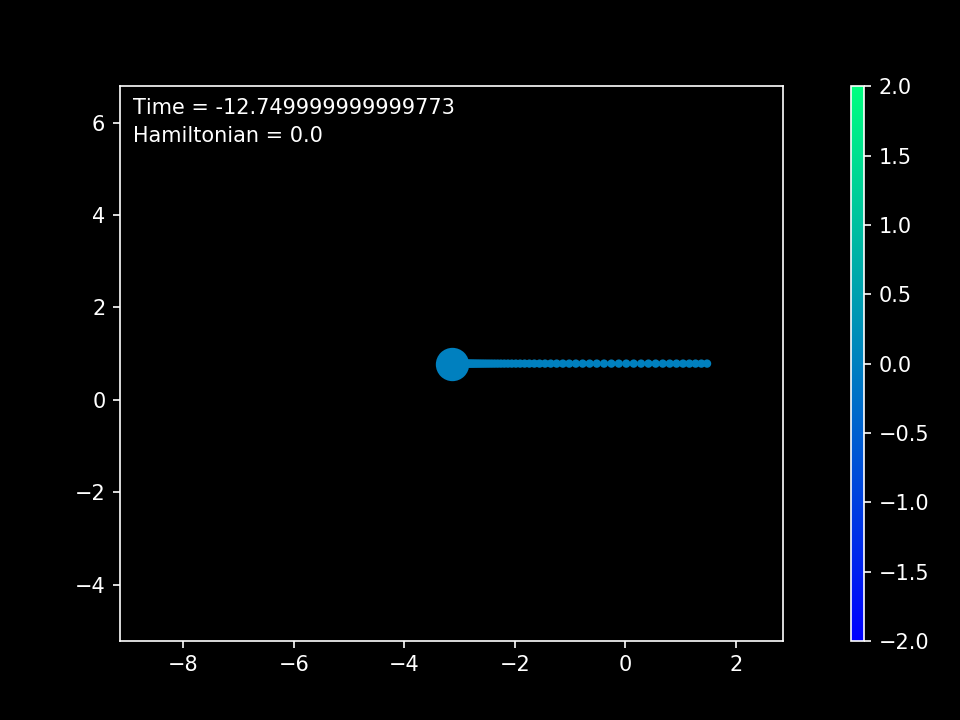

In [199]:
my_Sim_Helium.ShowAnimation(size = 6, follow_mass = -1, with_color = True, z_axis = [-2,2], save = False)
#my_Sim_Helium.ShowAnimation3D()

<IPython.core.display.Javascript object>


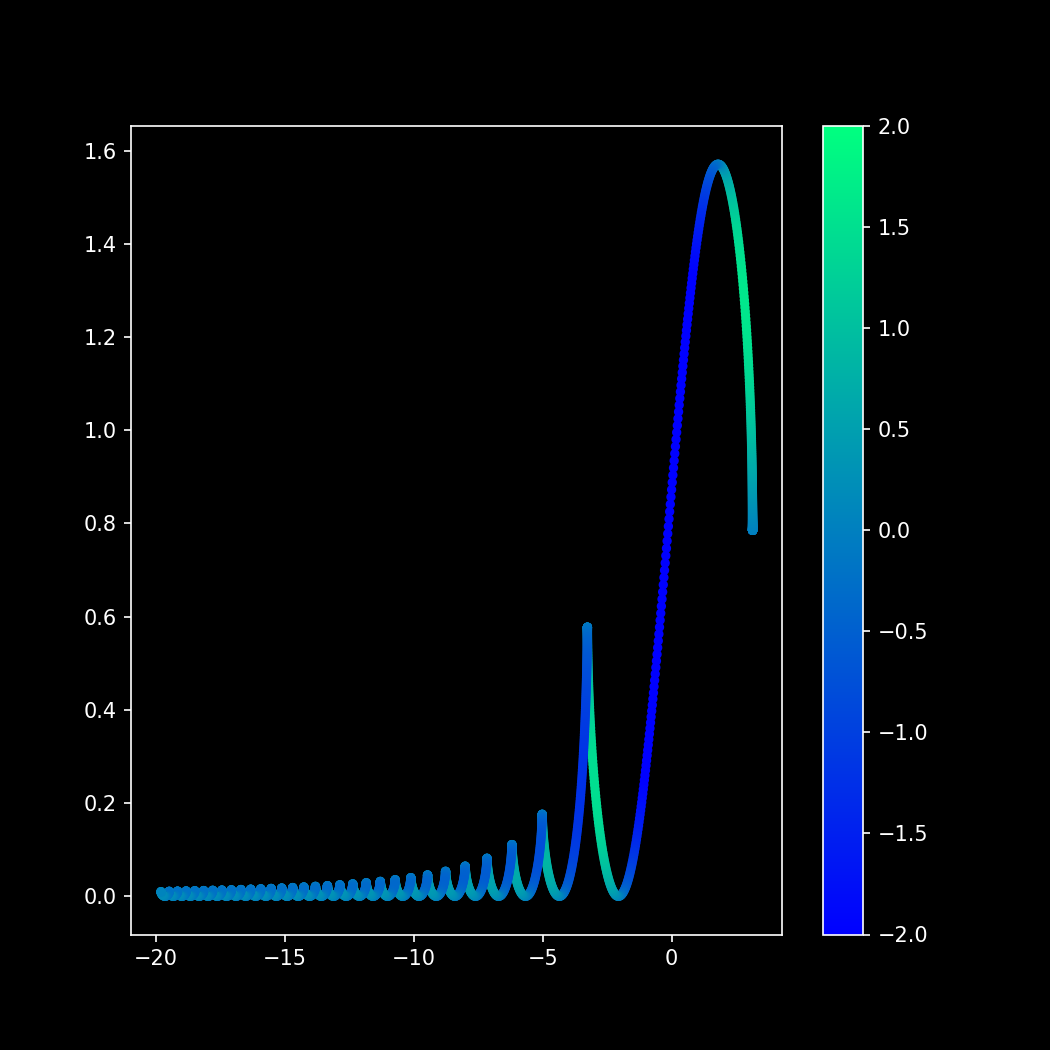

In [396]:
my_Sim_Helium.ShowStatic(with_color = True, z_axis = [-2,2], save = False)

In [39]:
#alpha = pi/2, means the 2nd particle has left
#alpha = 0, means the 1st particle has left

## Non Singular Equations (E != 0)

In [41]:
q = [[-3.5,0],[3.5,0]]
p = [[0,0],[0,0]]

Q,P,Q_bar, OldE = Two_Electron_Non_Singular(0, Z = 2).cart_to_QP(q,p)
Two_Electron_Non_Singular(0, Z = 2).cart_to_QP(q,p)

(array([0.        , 1.87082869, 1.87082869, 0.        ]),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -4.94974747]),
 array([0.        , 0.84089642, 0.84089642, 0.        ]),
 -1.0)

In [128]:
Q_bar = [0., 0.84089642,0.84089642, 0.]
P = [0.,  3.19134195,  3.19134195, 0., -1.00814863] 

In [46]:
par_Two_Electrons_Near_Non_Singular = partial(Two_Electron_Non_Singular)
my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_Non_Singular,Sim_Name="Helium_Sim_eZe",
                           time_step = 0.01, Calc_Ham = True)

my_Sim_Helium.speed = 15
my_Sim_Helium.AddParts([1000], Q_bar, P, Track_Length = [750])
my_Sim_Helium.CalcPath(40)

NameError: name 'Q_bar' is not defined

<IPython.core.display.Javascript object>


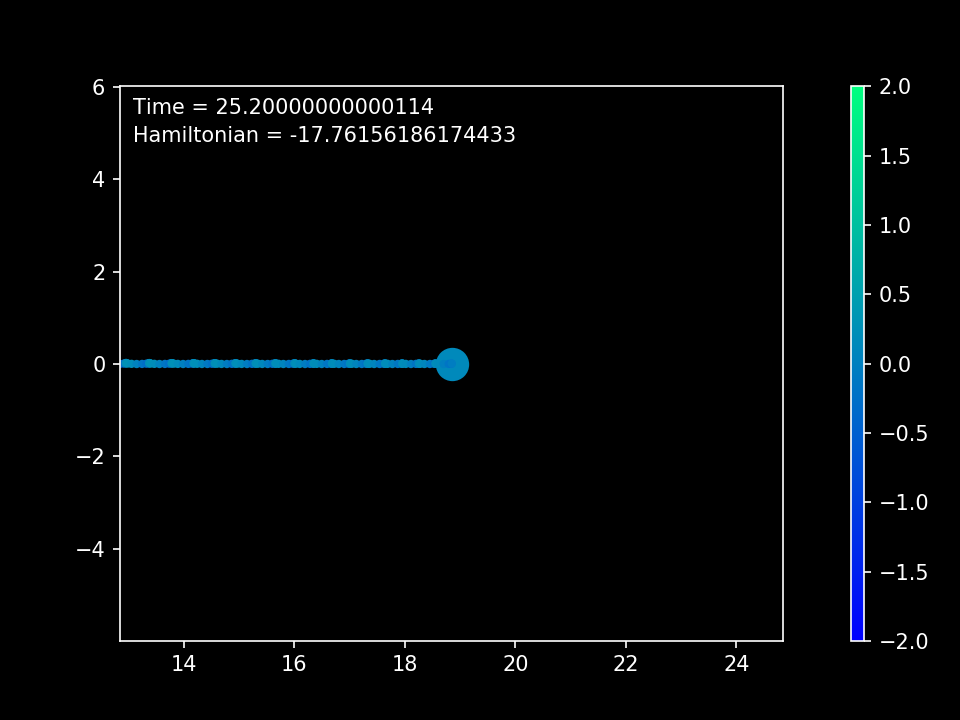

In [132]:
my_Sim_Helium.ShowAnimation(size = 6, follow_mass = -1, with_color = True, z_axis = [-2,2], save = False)

## PSOS

In [1]:
from PSOS import PSOS
import numpy as np

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[0] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[1] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:160: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[2] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:164: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_P[3] = -(temp1 - temp2)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:167: ComplexWarning: Casting complex values t

<IPython.core.display.Javascript object>


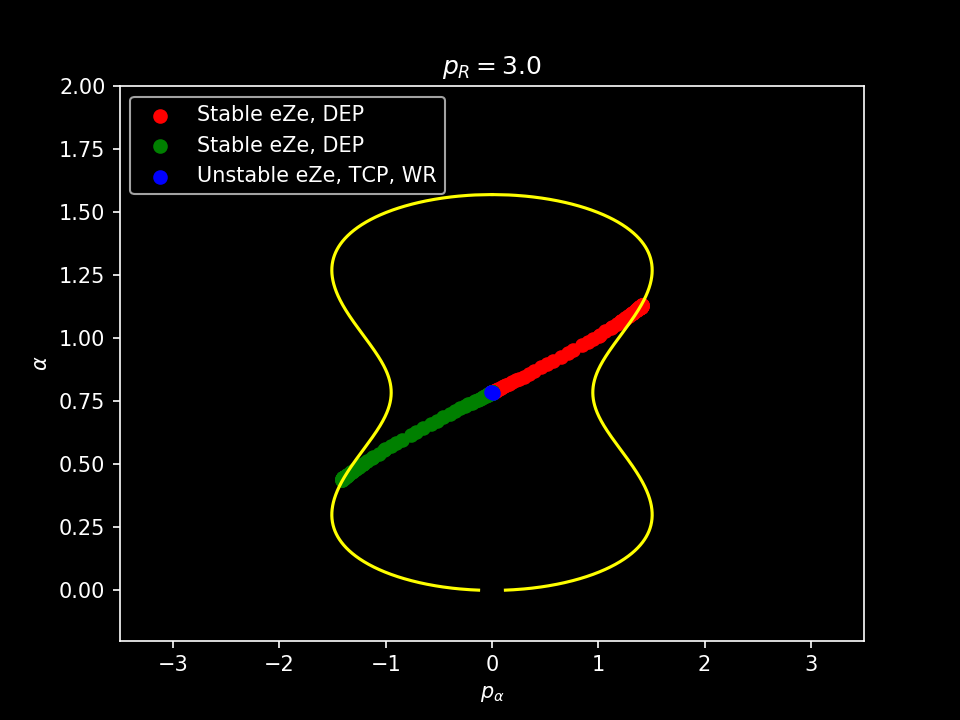

<IPython.core.display.Javascript object>


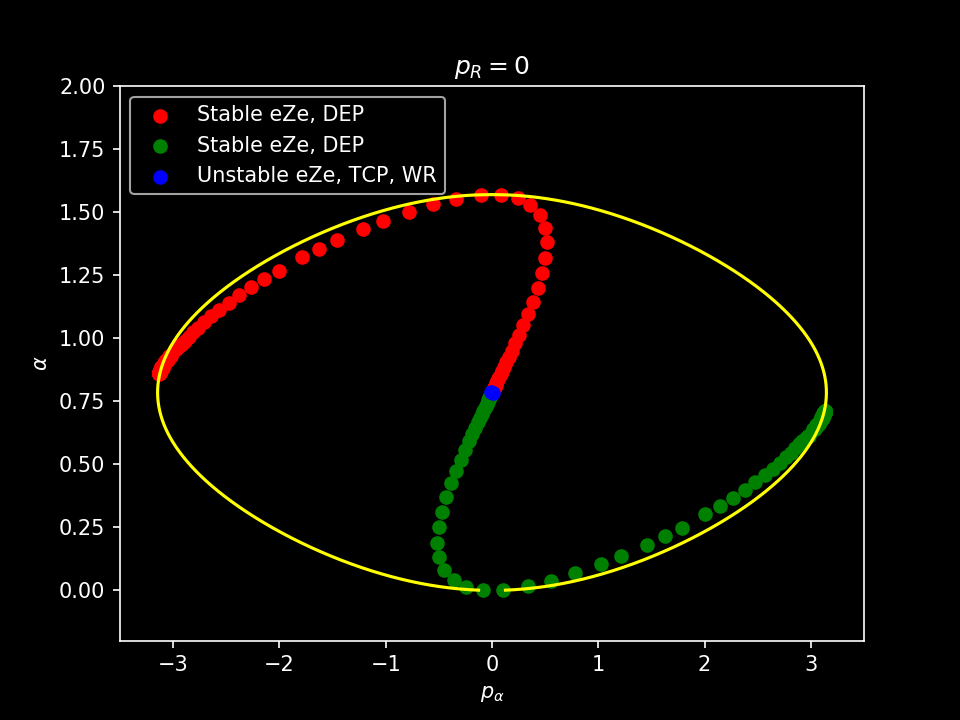

<IPython.core.display.Javascript object>


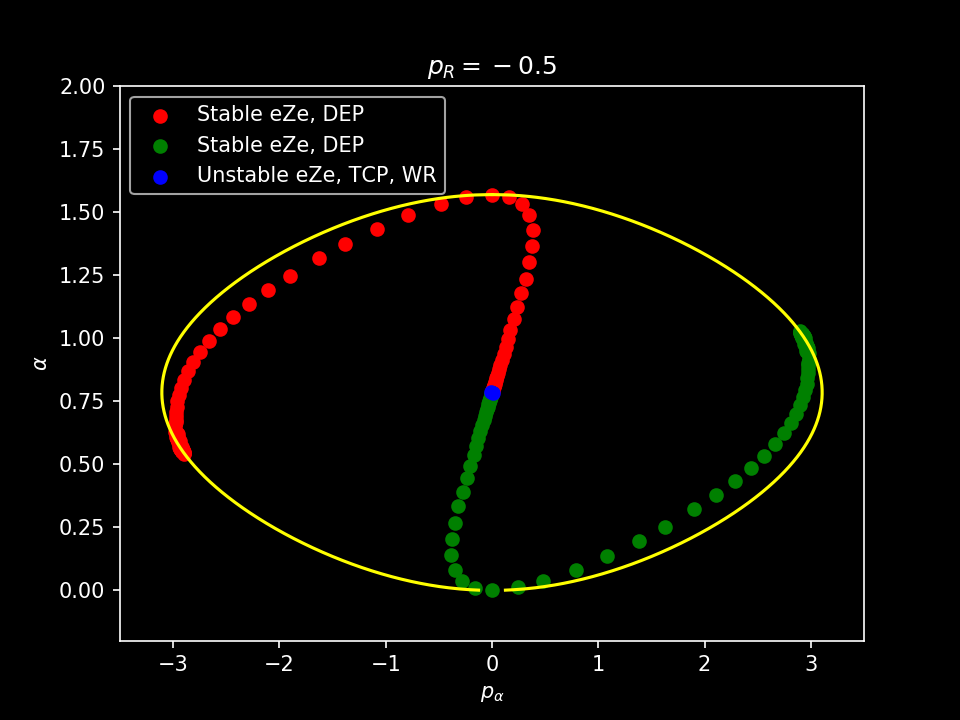

<IPython.core.display.Javascript object>


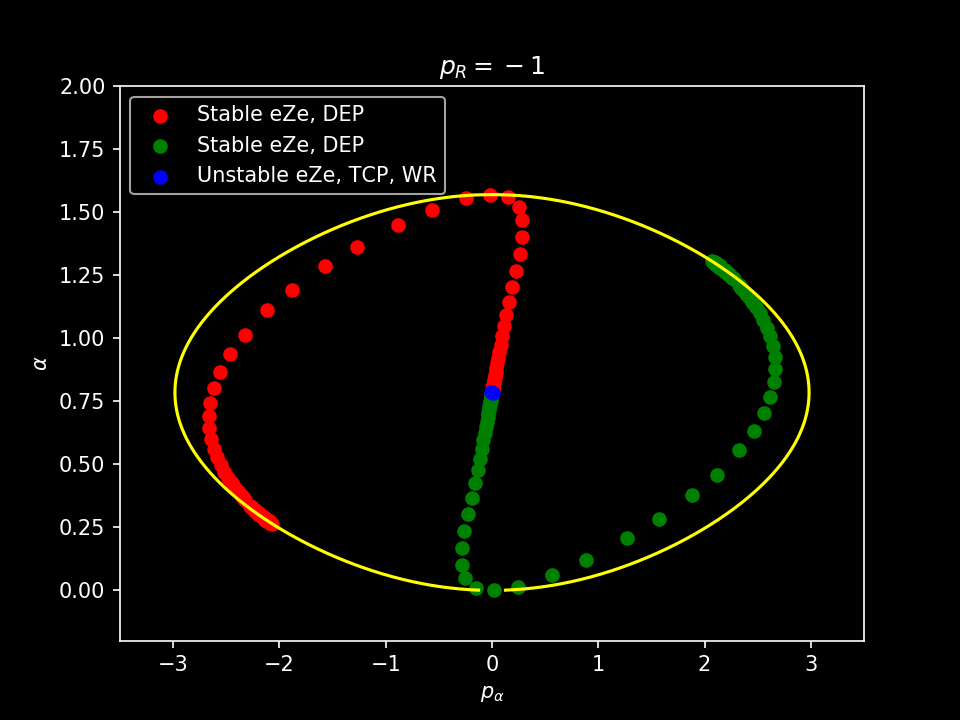

<IPython.core.display.Javascript object>


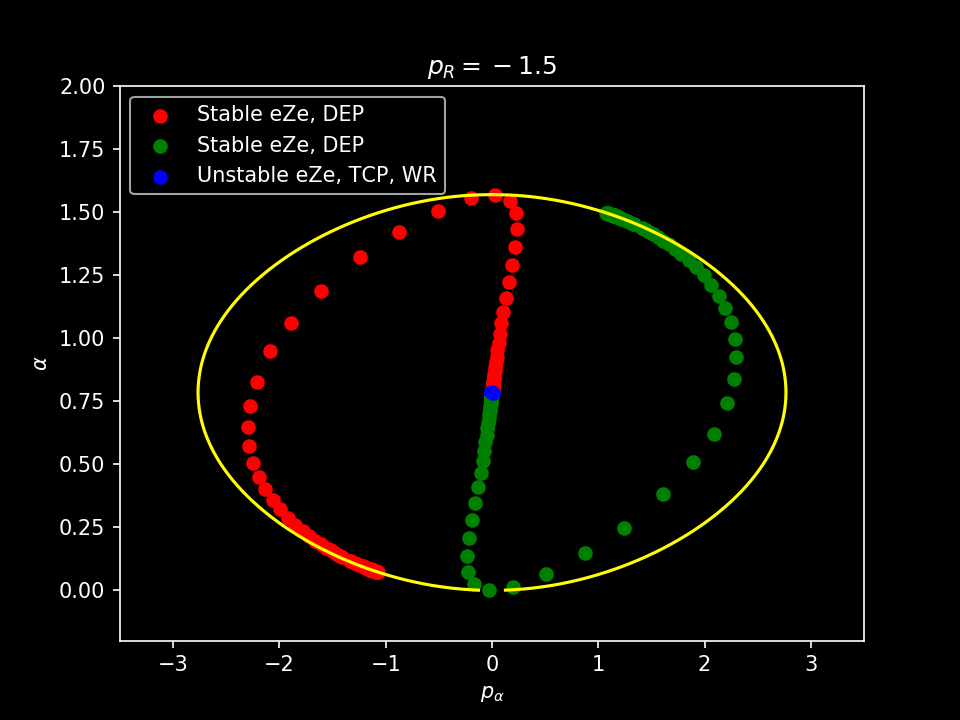

<IPython.core.display.Javascript object>


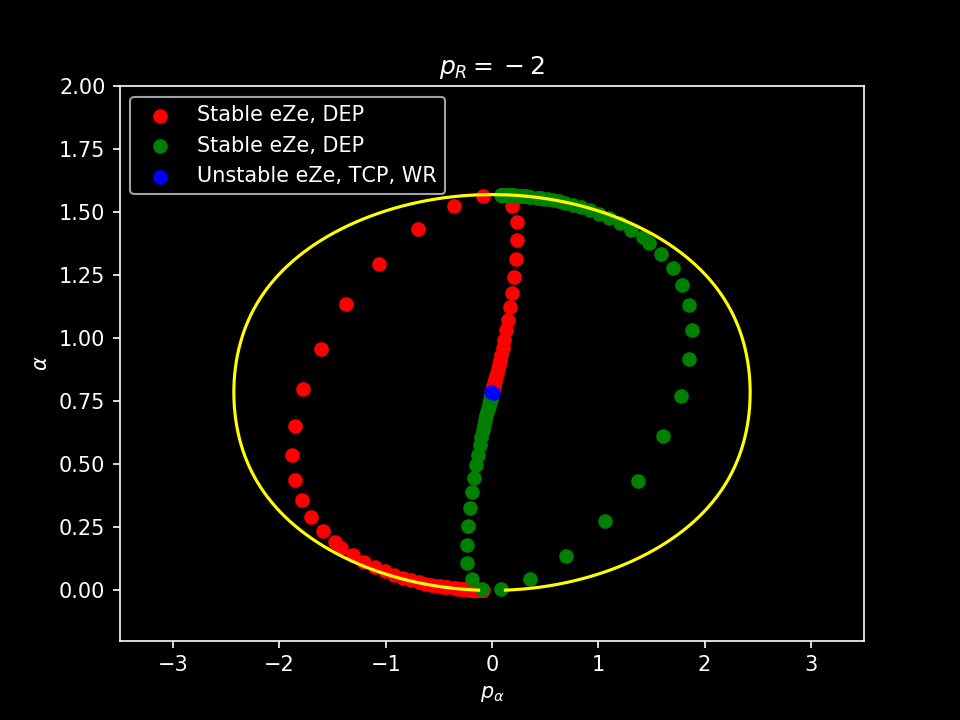

<IPython.core.display.Javascript object>


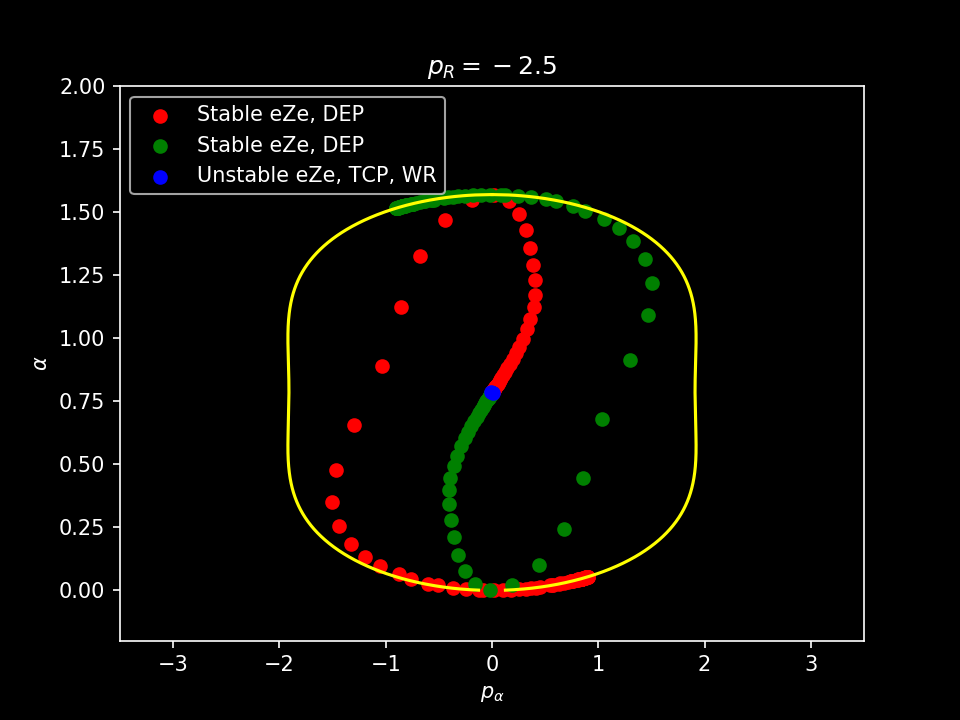

<IPython.core.display.Javascript object>


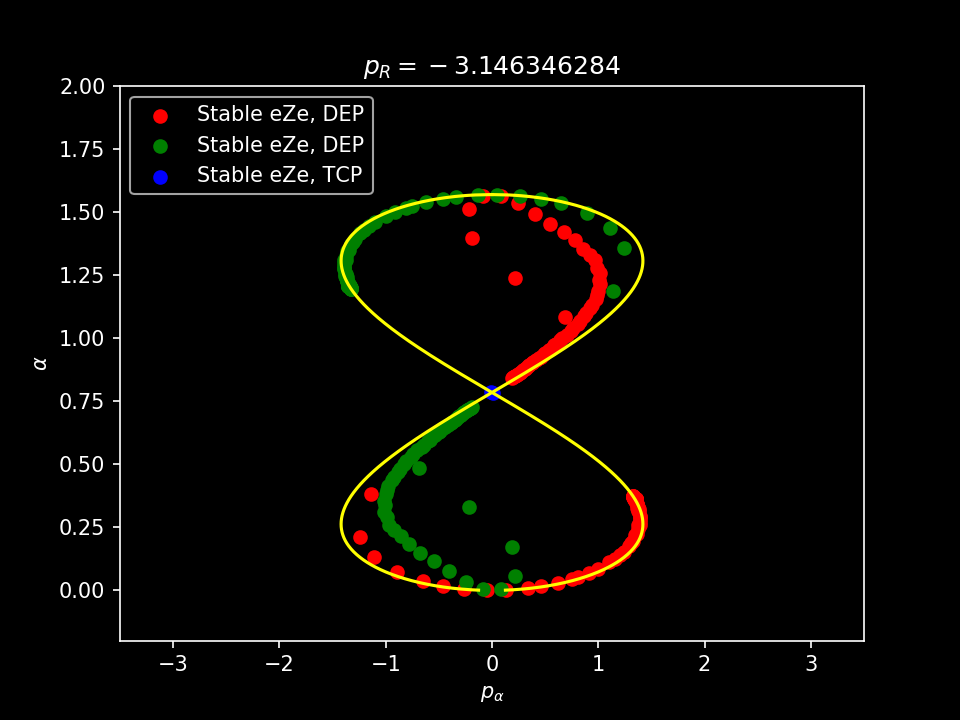

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\PSOS.py:21: RuntimeWarning: invalid value encountered in sqrt
  #Cross section of the eZe space at p_R when E = 0


<IPython.core.display.Javascript object>


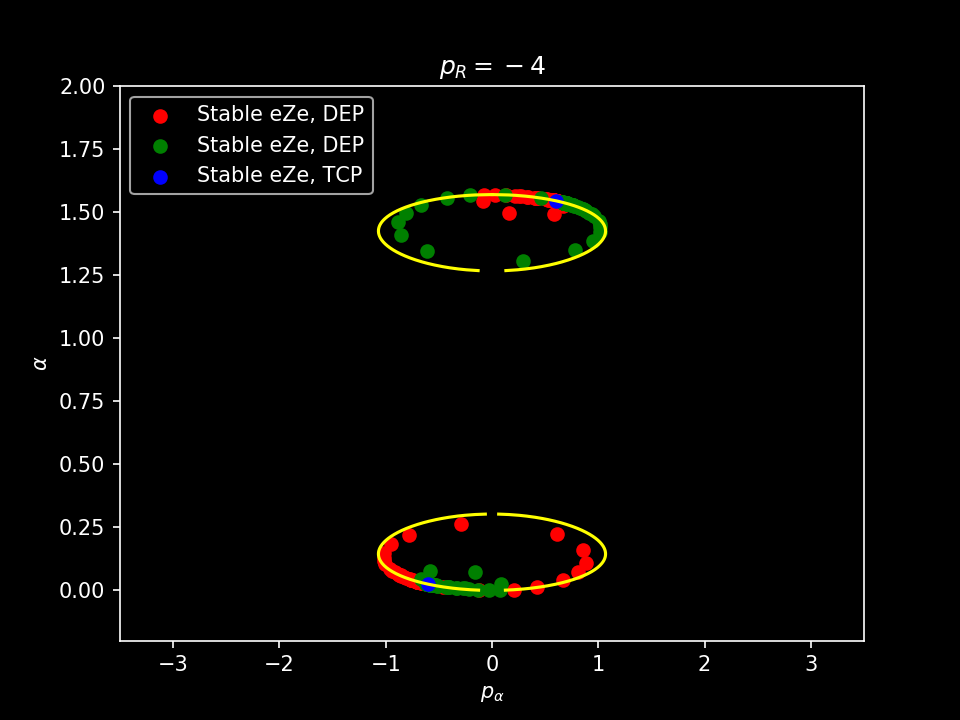

In [52]:
sections = np.linspace(-10,15,150)
PSOS([3., 0,-0.5,-1,-1.5,-2, -2.5, -3.146346284, -4], theta_ratios = sections, parallel = True, dots = True, save=True)

<IPython.core.display.Javascript object>


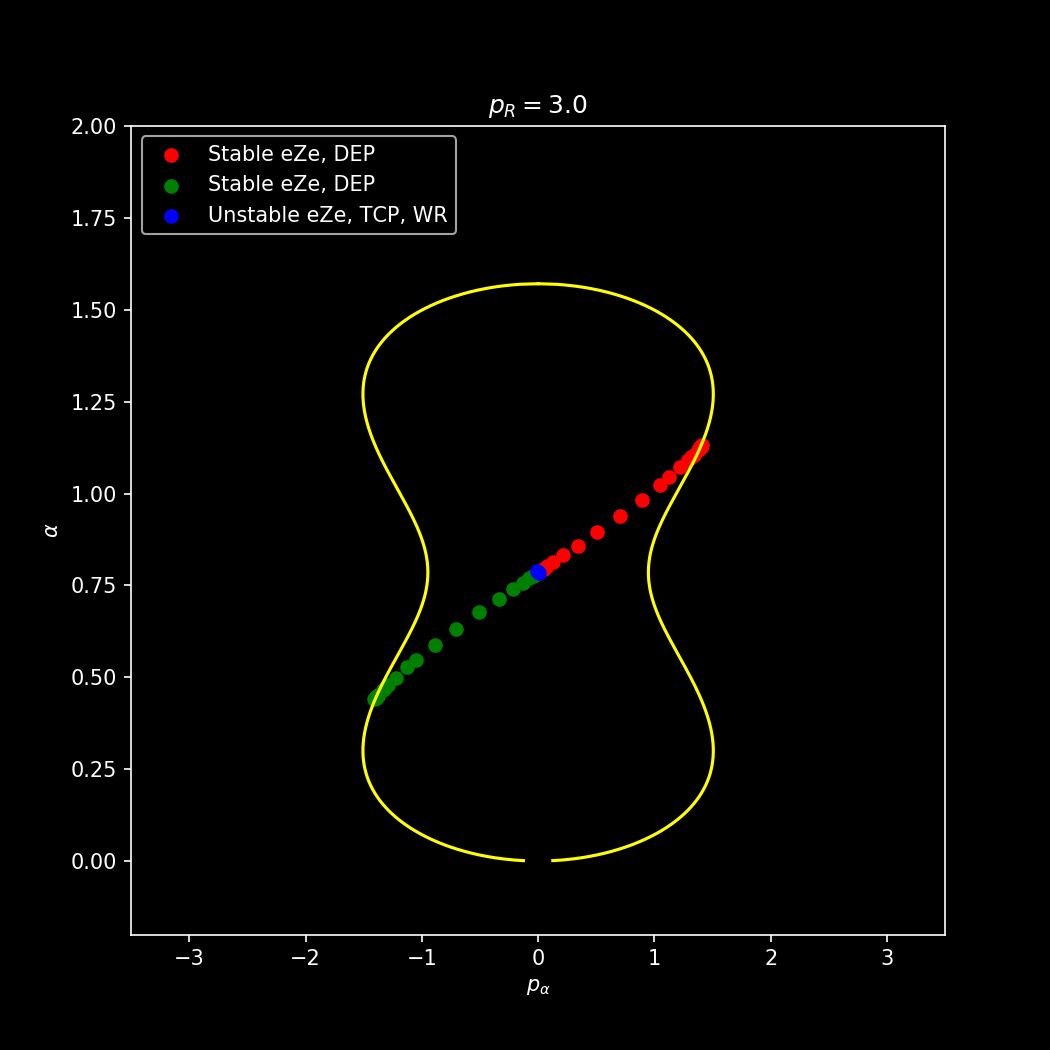

<IPython.core.display.Javascript object>


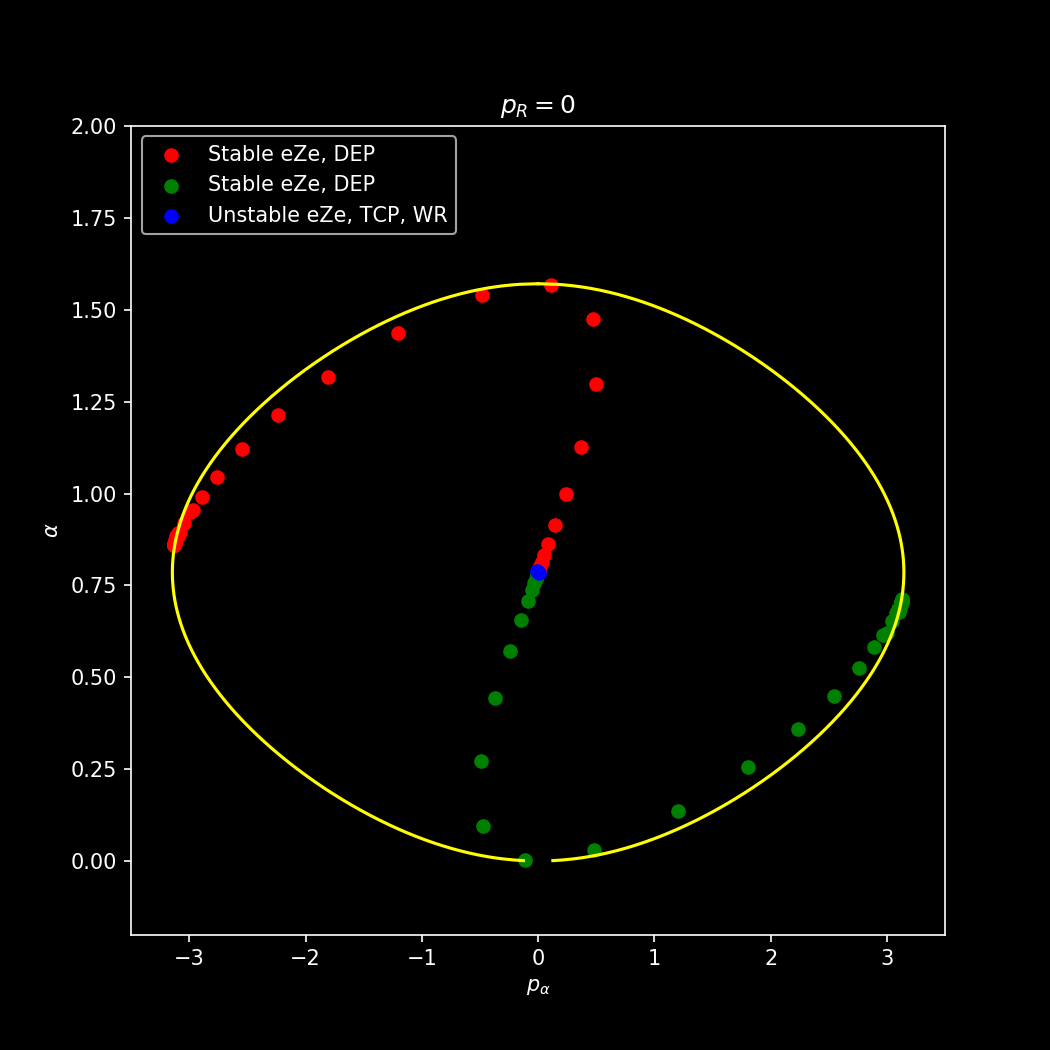

<IPython.core.display.Javascript object>


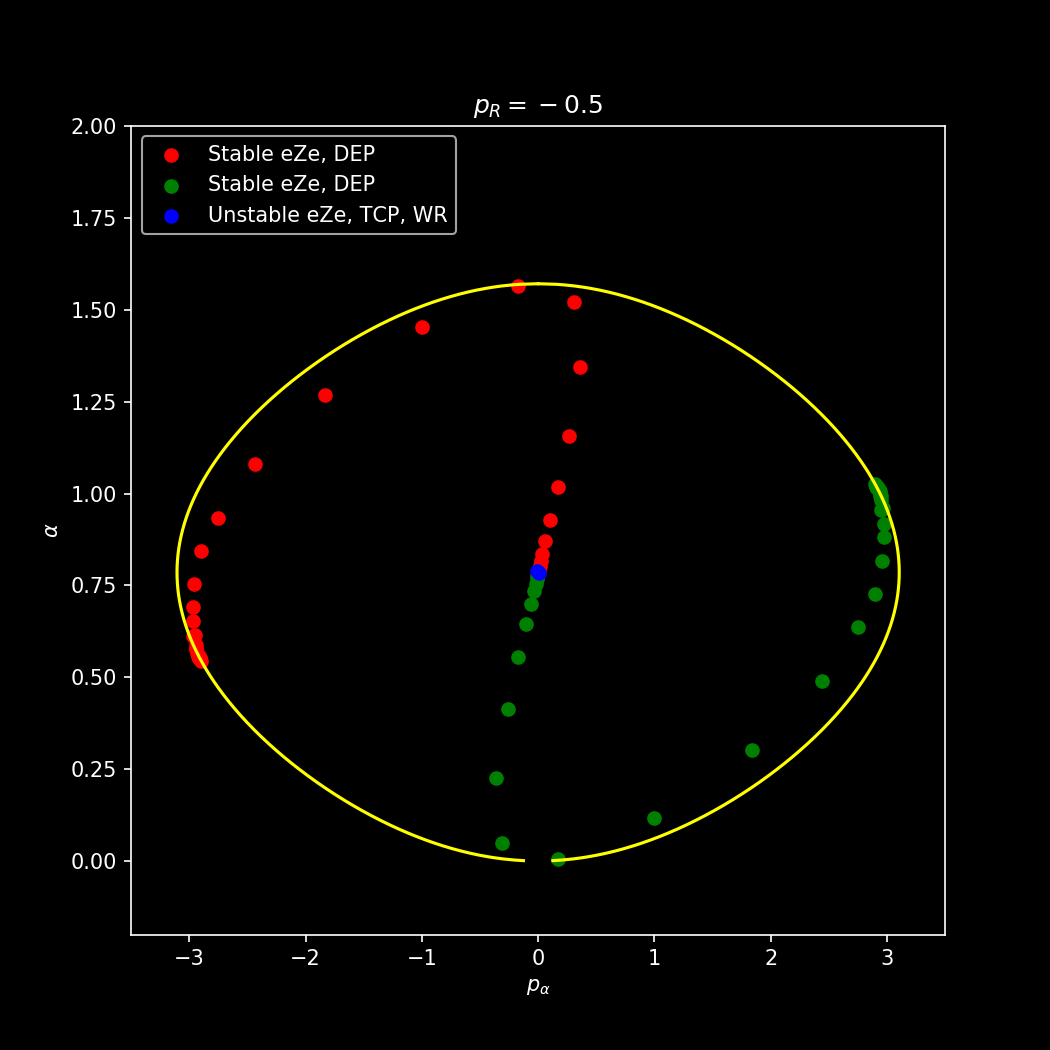

<IPython.core.display.Javascript object>


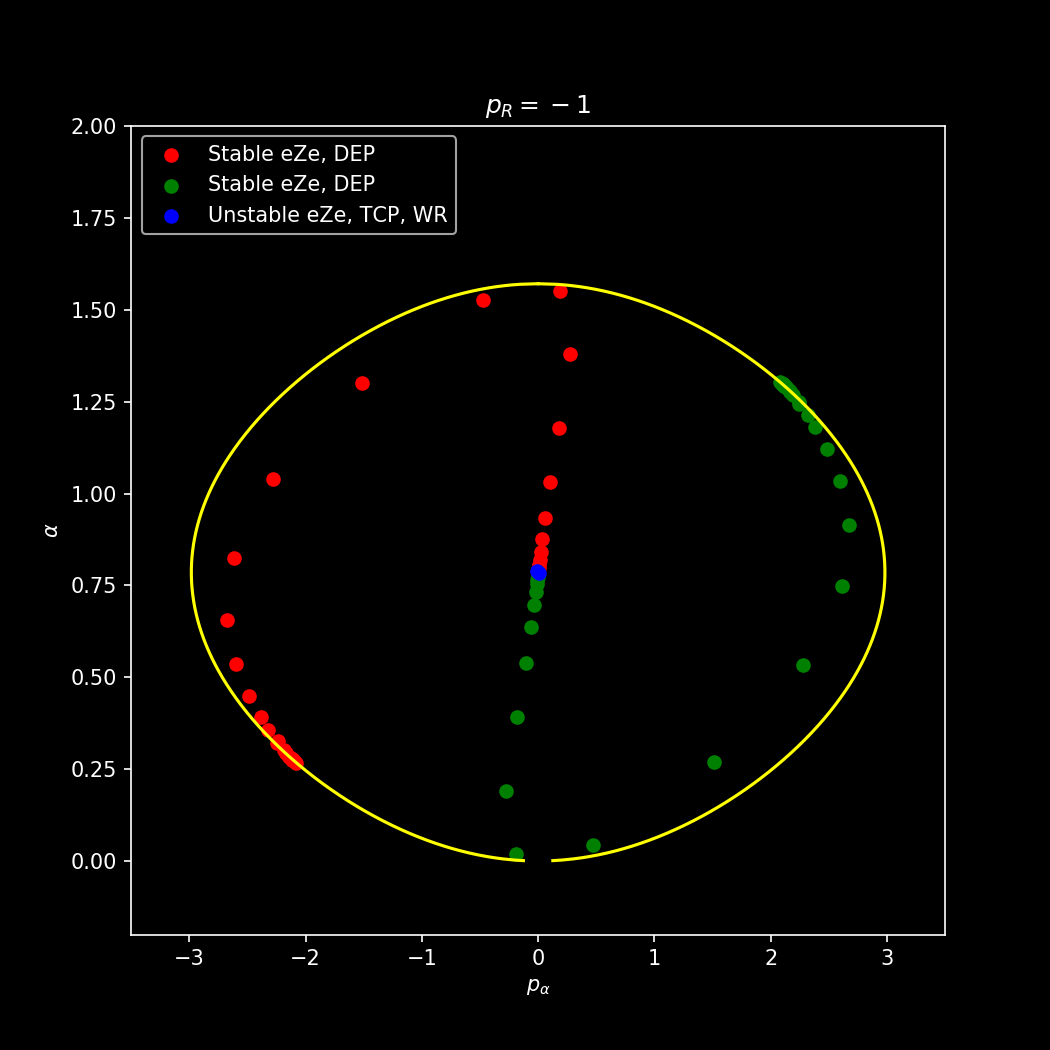

<IPython.core.display.Javascript object>


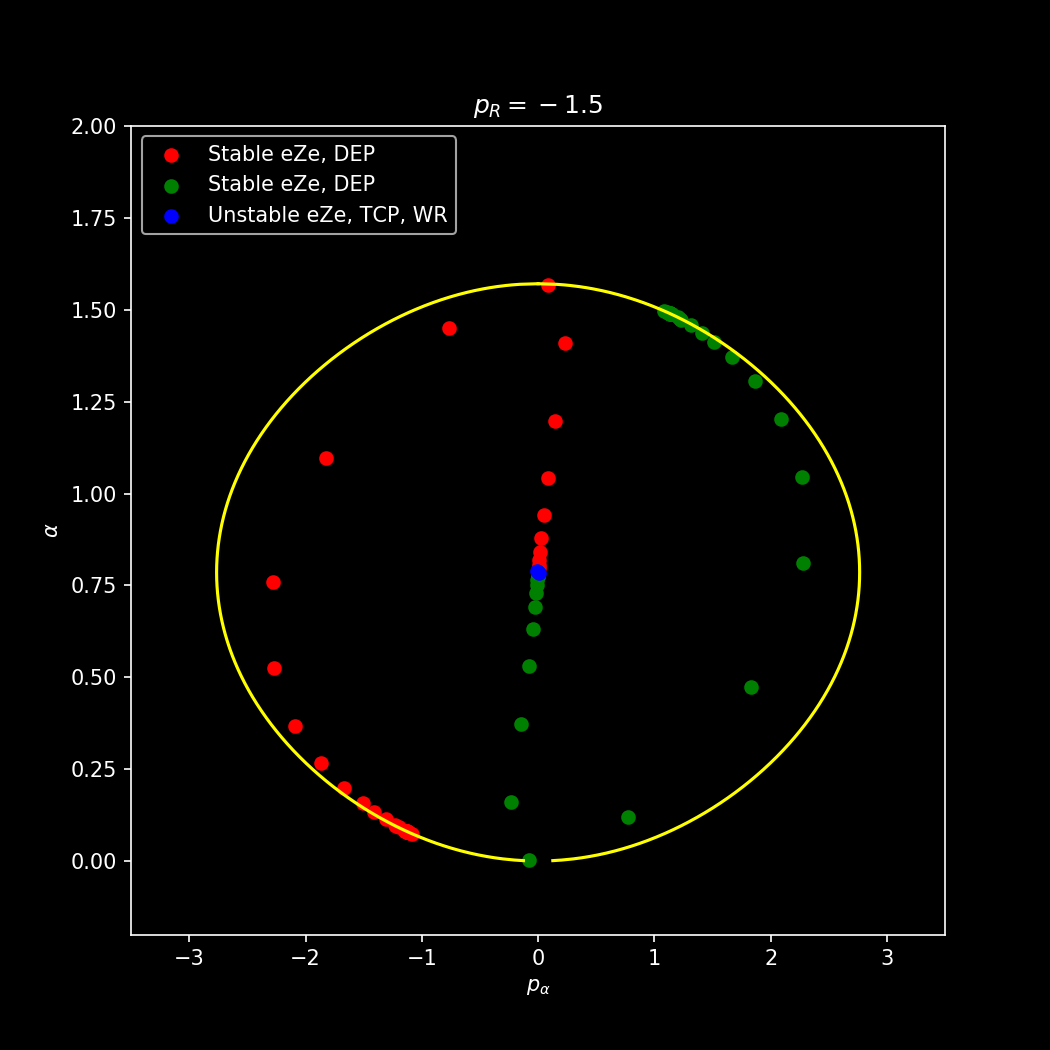

<IPython.core.display.Javascript object>


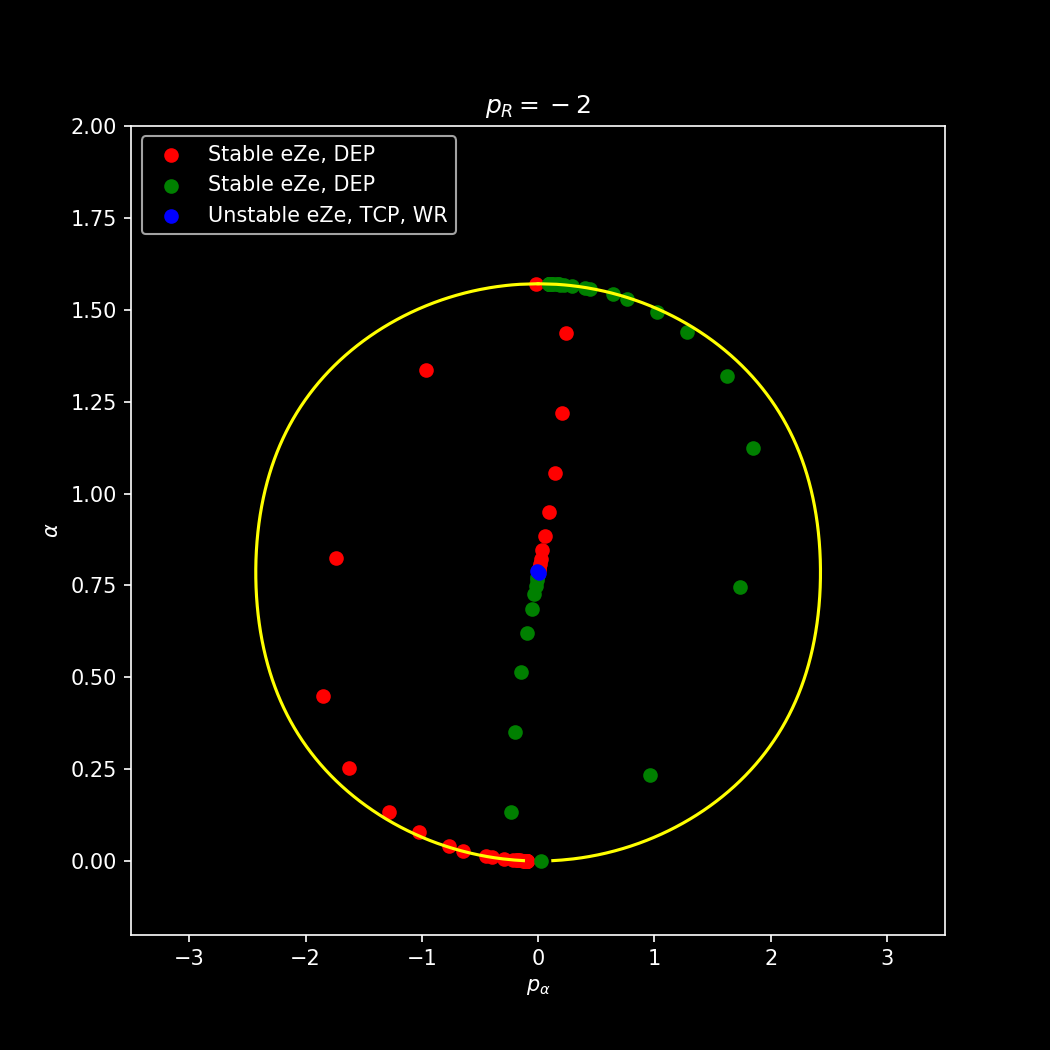

<IPython.core.display.Javascript object>


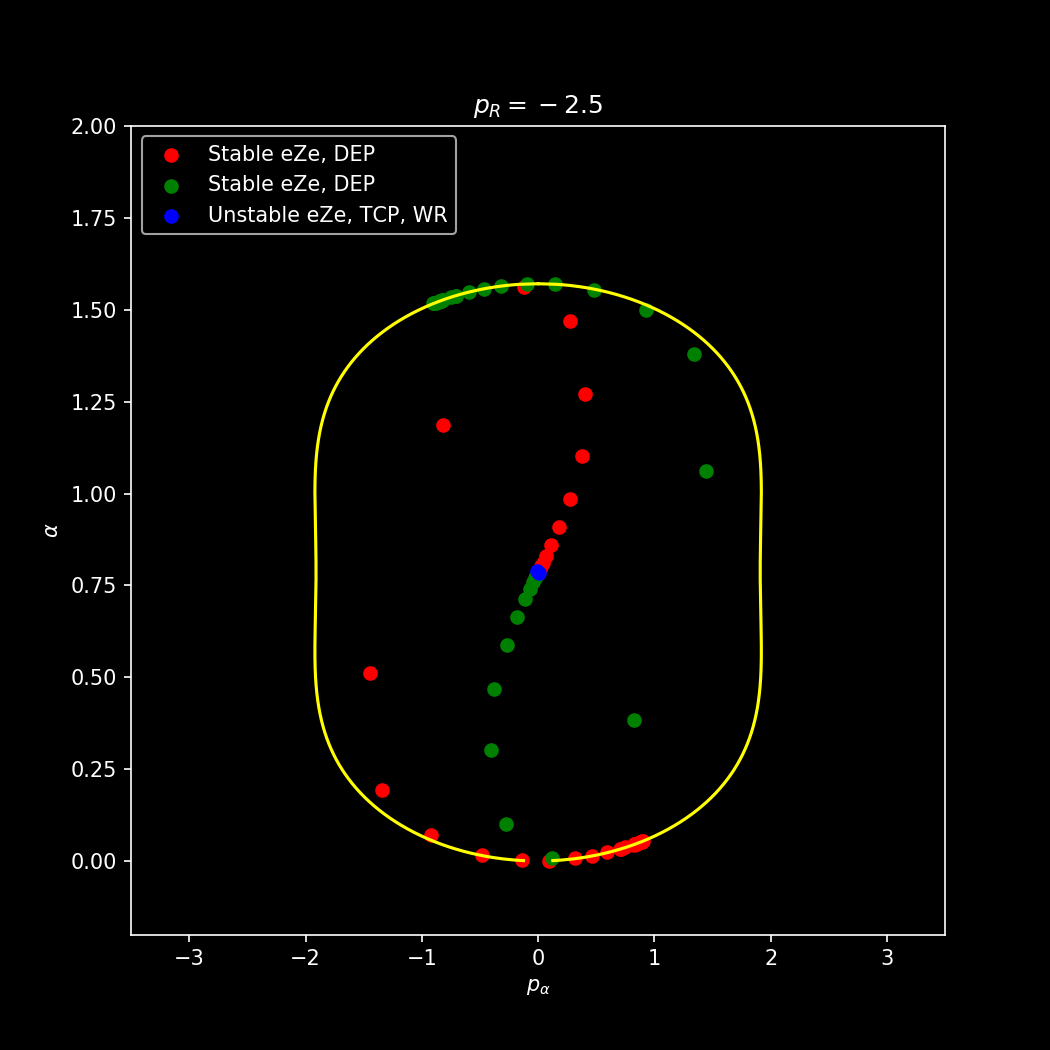

<IPython.core.display.Javascript object>


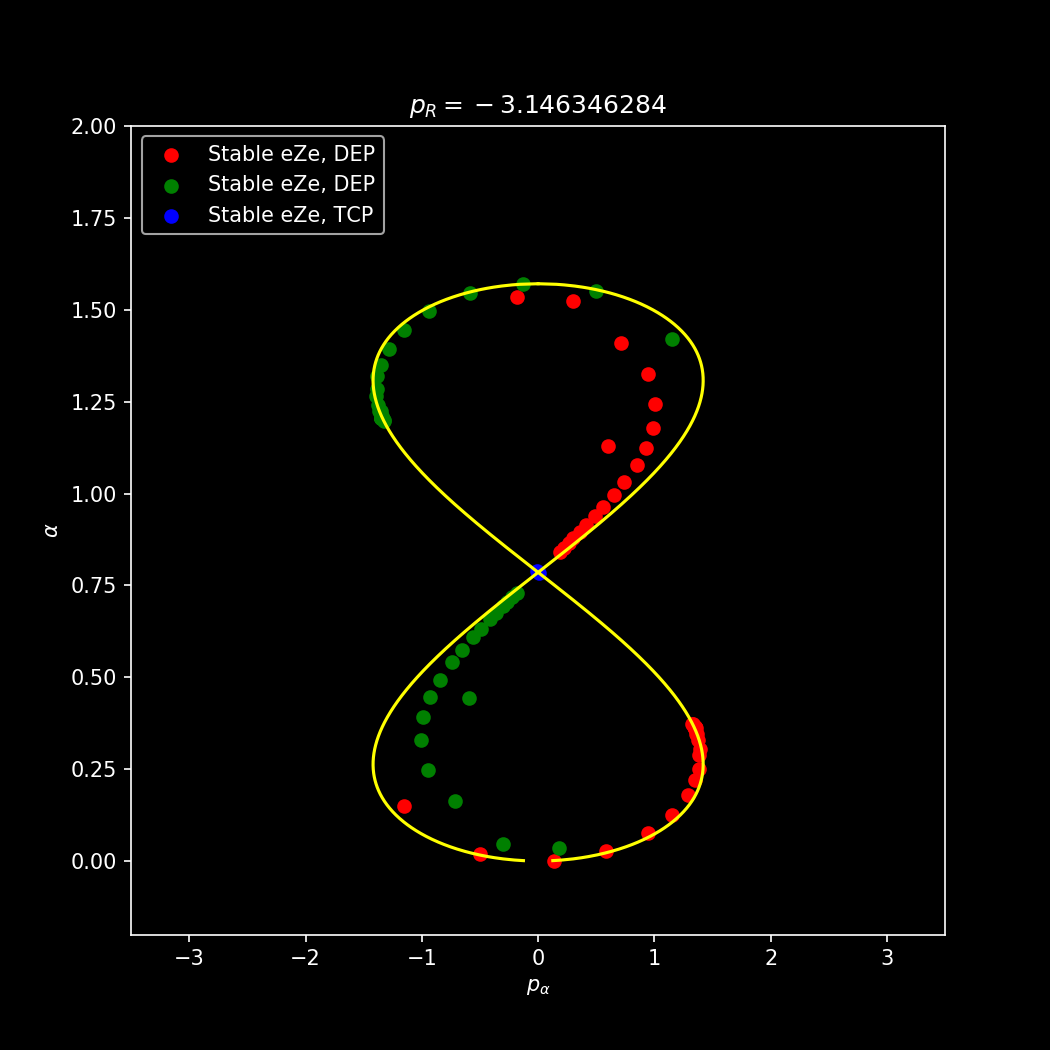

<IPython.core.display.Javascript object>


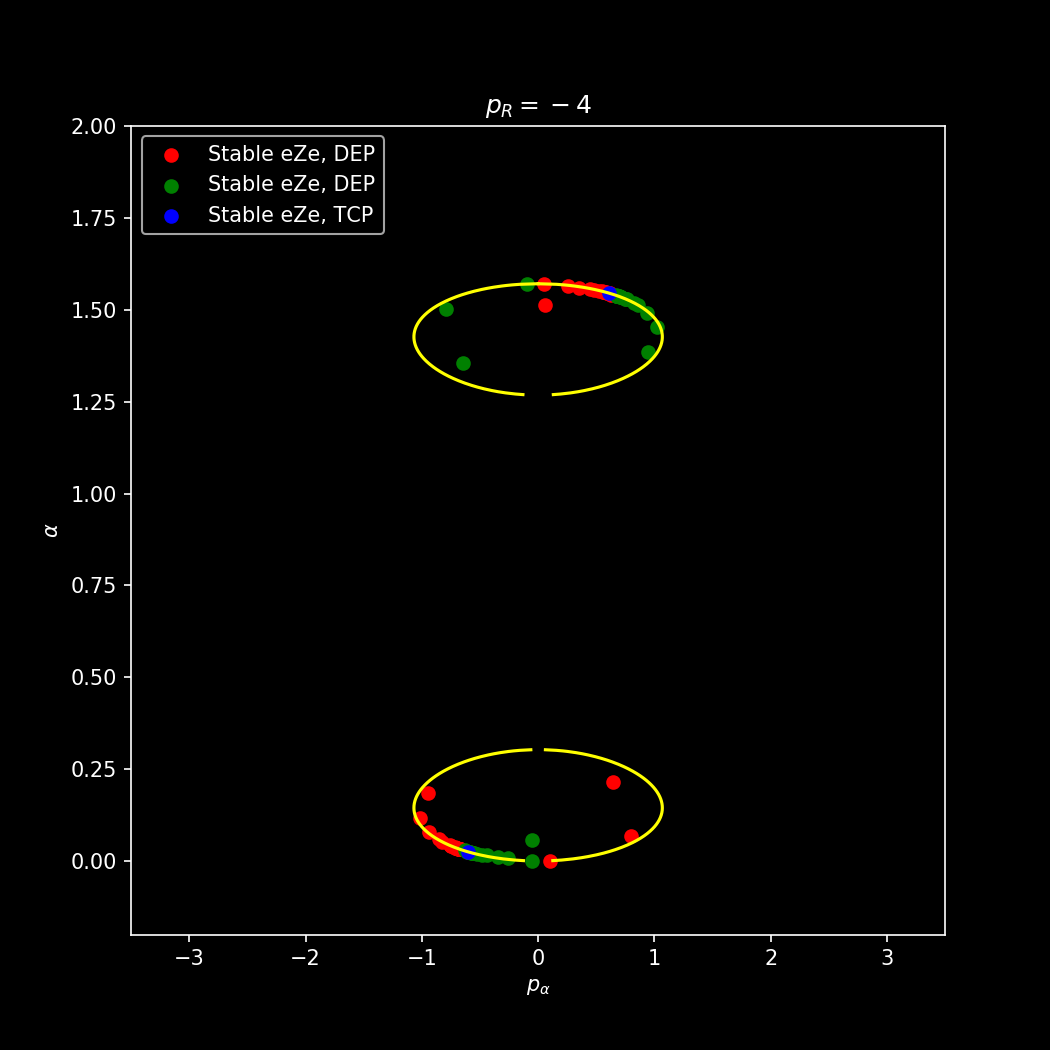

In [4]:
sections = np.linspace(-10, 15, 50)
PSOS([3., 0, -0.5, -1, -1.5, -2, -2.5, -3.146346284, -4],
     theta_ratios=sections,
     parallel=True, dots=True, save=True)